# PREPARE


In [ ]:
1. #sử dụng một số thư viện trong ngôn ngữ lập trình Python để thực hiện công việc liên quan đến xử lý dữ liệu và vẽ đồ thị.
- Cụ thể:
+ Pandas cung cấp các cấu trúc dữ liệu và công cụ phân tích dữ liệu, chủ yếu là DataFrame.DataFrame là một biểu diễn 
dữ liệu 2 chiều giống như bảng, giúp thuận tiện cho việc thao tác và phân tích dữ liệu.
import numpy as np:
+ NumPy là một thư viện chuyên về tính toán số học trong Python. Nó cung cấp một đối tượng mảng đa chiều (numpy array)
và các chức năng để làm việc với mảng này.
+ Matplotlib là một thư viện trực quan hóa dữ liệu trong Python. pyplot là một phần của Matplotlib, cung cấp các chức năng để 
tạo ra đồ thị và biểu đồ.
+ Seaborn là một thư viện trực quan hóa dữ liệu xây dựng trên Matplotlib. Nó cung cấp giao diện cao cấp và các chủ đề mặc định 
để làm cho việc tạo đồ thị và biểu đồ trở nên dễ dàng hơn.
+ warnings và warnings.filterwarnings("ignore"):Đoạn này được sử dụng để tắt thông báo cảnh báo trong quá trình chạy chương 
trình, giúp tránh việc hiển thị các cảnh báo không quan trọng.
+ Datetime cung cấp các lớp và chức năng để làm việc với thời gian và ngày tháng trong Python. Trong trường hợp này, nó có 
thể được sử dụng để thao tác và xử lý dữ liệu thời gian.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import datetime as dt

In [ ]:
2. #Đưa dữ liệu vào để sử dụng

In [2]:
customers_df= pd.read_csv('D:/Dai Hoc/năm 4 kỳ 1/phân tích dữ liệu bằng python/data midterm/olist_customers_dataset.csv')
geolocation_df= pd.read_csv("D:/Dai Hoc/năm 4 kỳ 1/phân tích dữ liệu bằng python/data midterm/olist_geolocation_dataset.csv")
items_df= pd.read_csv('D:/Dai Hoc/năm 4 kỳ 1/phân tích dữ liệu bằng python/data midterm/olist_order_items_dataset.csv')
payments_df= pd.read_csv('D:/Dai Hoc/năm 4 kỳ 1/phân tích dữ liệu bằng python/data midterm/olist_order_payments_dataset.csv')
reviews_df= pd.read_csv('D:/Dai Hoc/năm 4 kỳ 1/phân tích dữ liệu bằng python/data midterm/olist_order_reviews_dataset.csv')
orders_df= pd.read_csv('D:/Dai Hoc/năm 4 kỳ 1/phân tích dữ liệu bằng python/data midterm/olist_orders_dataset.csv')
products_df= pd.read_csv('D:/Dai Hoc/năm 4 kỳ 1/phân tích dữ liệu bằng python/data midterm/olist_products_dataset.csv')
sellers_df= pd.read_csv('D:/Dai Hoc/năm 4 kỳ 1/phân tích dữ liệu bằng python/data midterm/olist_sellers_dataset.csv')
category_translation_df= pd.read_csv('D:/Dai Hoc/năm 4 kỳ 1/phân tích dữ liệu bằng python/data midterm/product_category_name_translation.csv')

# Data Preprocessing

In [ ]:
3. #tạo ra một bảng tóm tắt về các bộ dữ liệu có sẵn trong danh sách datasets.
- Khởi tạo danh sách datasets và titles
+ datasets: Danh sách chứa các DataFrame (customers_df, geolocation_df, items_df, ...).
+ titles: Danh sách chứa tên tương ứng của từng DataFrame.
    
- Tạo DataFrame trống data_summary: để lưu trữ thông tin tóm tắt.
+ data_summary['datasets'] = titles: Thêm cột 'datasets' vào DataFrame và gán giá trị từ danh sách titles.
    
- Tính toán thông tin về cột:
+ data_summary['columns']: Sử dụng list comprehension để lấy tên các cột có giá trị null từ mỗi DataFrame.
    Sau đó dùng ', '.join(...) chuyển danh sách các tên cột thành một chuỗi, ngăn cách bởi dấu phẩy.
+ data_summary['total_rows']: Số lượng dòng trong mỗi DataFrame.
+ data_summary['total_cols']: Số lượng cột trong mỗi DataFrame.
+ data_summary['total_duplicate']: Số lượng hàng trùng lặp trong mỗi DataFrame.
+ data_summary['total_null']: Tổng số giá trị null trong mỗi DataFrame.
    
- Thêm cột 'null_cols' vào DataFrame data_summary:
+ data_summary['null_cols']: Sử dụng list comprehension để lấy tên các cột có giá trị null từ mỗi DataFrame.
    Sau đó cũng dùng ', '.join(...) chuyển danh sách các tên cột thành một chuỗi, ngăn cách bởi dấu phẩy.
    
- Áp dụng kiểu màu nền gradient:
+ Data_summary.style.background_gradient(cmap='YlGnBu'): Áp dụng kiểu màu nền gradient cho DataFrame để làm cho bảng tóm tắt 
trở nên dễ đọc hơn. Nhìn chung, đoạn code này giúp tạo ra một bảng tóm tắt chứa thông tin quan trọng về các bộ dữ liệu
trong danh sách, như số lượng dòng, số lượng cột, số lượng hàng trùng lặp, tổng số giá trị null và tên các cột có giá trị null.

In [4]:
datasets = [customers_df, geolocation_df, items_df, payments_df, reviews_df, orders_df, products_df, sellers_df, category_translation_df]
titles = ["customers", "geolocation", "items", "payments", "reviews", "orders", "products", "sellers", "category_translation"]

data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['columns'] = [', '.join([col for col, null in data.isnull().sum().items() ]) for data in datasets]
data_summary['total_rows']= [data.shape[0] for data in datasets]
data_summary['total_cols']= [data.shape[1] for data in datasets]
data_summary['total_duplicate']= [len(data[data.duplicated()]) for data in datasets]
data_summary['total_null']= [data.isnull().sum().sum() for data in datasets]
data_summary['null_cols'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]
data_summary.style.background_gradient(cmap='YlGnBu')

,datasets,columns,total_rows,total_cols,total_duplicate,total_null,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,
1,geolocation,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163,5,261831,0,
2,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,
3,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0,
4,reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",99224,7,0,145903,"review_comment_title, review_comment_message"
5,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441,8,0,4908,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
6,products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951,9,0,2448,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
7,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,
8,category_translation,"product_category_name, product_category_name_english",71,2,0,0,


In [ ]:
4. #Drop null and duplicates
- Đoạn code for i in datasets:
                i.dropna(inplace=True) 
+ được sử dụng để loại bỏ các dòng có giá trị null từ mỗi DataFrame trong danh sách datasets.
+ cụ thể: 
    for i in datasets:Duyệt qua mỗi DataFrame trong danh sách datasets.
    i.dropna(inplace=True):
i: DataFrame hiện đang được xử lý trong vòng lặp.
dropna(): Phương thức của DataFrame trong Pandas được sử dụng để loại bỏ các dòng có ít nhất một giá trị null.
inplace=True: Thực hiện thay đổi trực tiếp trên DataFrame hiện tại mà không cần phải gán kết quả cho một biến khác.
Sau khi chạy các DataFrame trong danh sách sẽ không còn chứa dòng nào có giá trị null. 
#việc loại bỏ dòng có giá trị null có thể ảnh hưởng đến khả năng phân tích dữ liệu, tùy thuộc vào bối cảnh cụ thể của bài toán.

In [5]:
for i in datasets:
    i.dropna(inplace=True)

In [ ]:
5.  #Drop null and duplicates
Đoạn mã `for i in datasets:
            i.drop(i[i.duplicated()].index, axis=0, inplace=True)
+ được sử dụng để loại bỏ các dòng trùng lặp từ mỗi DataFrame trong danh sách datasets
+ cụ thể:
    Vòng lặp `for i in datasets: Duyệt qua mỗi DataFrame trong danh sách datasets
    i[i.duplicated()]: 
i: DataFrame hiện đang được xử lý trong vòng lặp.
i.duplicated(): Trả về một Series boolean, đánh dấu True cho các dòng là bản sao của các dòng trùng lặp
Series boolean là một đối tượng Series chứa các giá trị boolean. Mỗi phần tử trong Series boolean tương ứng với một phần tử
trong Series gốc  và có giá trị là True hoặc False dựa trên một điều kiện nào đó. Ở đoạn code này mỗi phần tử trong Series này 
sẽ là True nếu dòng tương ứng là một bản sao của dòng nào đó trước đó và là False nếu không phải.
    i[i.duplicated()].index : Lấy chỉ mục (index) của các dòng bị trùng lặp.
    i.drop(...): Phương thức của DataFrame trong Pandas được sử dụng để loại bỏ các dòng dựa trên chỉ mục (index).
    axis=0: Đối số axis=0 chỉ ra rằng chúng ta đang thực hiện thao tác trên các dòng
    inplace=True: Thực hiện thay đổi trực tiếp trên DataFrame hiện tại mà không cần phải gán kết quả cho một biến khác.
Sau khi chạy đoạn mã này, các DataFrame trong danh sách sẽ không còn chứa dòng nào là bản sao của các dòng khác. 

In [6]:
for i in datasets:
    i.drop(i[i.duplicated()].index, axis=0, inplace=True)

In [ ]:
6. #Check lại dữ liệu
code dưới tương tự như 3. nhưng dùng để check lại sau khi drop null và duplicates.

In [7]:
data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['columns'] = [', '.join([col for col, null in data.isnull().sum().items() ]) for data in datasets]
data_summary['total_rows']= [data.shape[0] for data in datasets]
data_summary['total_cols']= [data.shape[1] for data in datasets]
data_summary['total_duplicate']= [len(data[data.duplicated()]) for data in datasets]
data_summary['total_null']= [data.isnull().sum().sum() for data in datasets]
data_summary['null_cols'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]
data_summary.style.background_gradient(cmap='YlGnBu')

,datasets,columns,total_rows,total_cols,total_duplicate,total_null,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,
1,geolocation,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",738332,5,0,0,
2,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,
3,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0,
4,reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",9839,7,0,0,
5,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",96461,8,0,0,
6,products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32340,9,0,0,
7,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,
8,category_translation,"product_category_name, product_category_name_english",71,2,0,0,


In [ ]:
7. #nối các DataFrame khác nhau dựa trên các cột khóa chung.
+ merged_df = pd.merge(customers_df, orders_df, on="customer_id"): Thực hiện phép nối giữa DataFrame customers_df
    và orders_df dựa trên cột "customer_id". Kết quả là một DataFrame mới merged_df chứa thông tin từ cả hai DataFrame.
+ merged_df = merged_df.merge(reviews_df, on="order_id"): Tiếp tục phép nối trước đó bằng cách thêm thông tin từ DataFrame 
    reviews_df dựa trên cột "order_id".
+ merged_df = merged_df.merge(items_df, on="order_id"): Tiếp tục phép nối để thêm thông tin từ DataFrame items_df 
    dựa trên cột "order_id".
+ merged_df = merged_df.merge(products_df, on="product_id"): Tiếp tục phép nối để thêm thông tin từ DataFrame products_df
    dựa trên cột "product_id".
+ merged_df = merged_df.merge(payments_df, on="order_id"): Tiếp tục phép nối để thêm thông tin từ DataFrame payments_df 
    dựa trên cột "order_id".
+ merged_df = merged_df.merge(sellers_df, on='seller_id'): Tiếp tục phép nối để thêm thông tin từ DataFrame sellers_df
    dựa trên cột "seller_id".
+ merged_df = merged_df.merge(category_translation_df, on='product_category_name'): Tiếp tục phép nối để thêm thông tin từ 
    DataFrame category_translation_df dựa trên cột "product_category_name".
- Cuối cùng, merged_df.shape trả về kích thước của DataFrame kết quả, nó là số dòng và số cột của DataFrame sau khi thực hiện 
tất cả các phép nối. Điều này có thể giúp kiểm tra và đảm bảo rằng phép nối đã được thực hiện đúng.

In [8]:
merged_df= pd.merge(customers_df, orders_df, on="customer_id")
merged_df= merged_df.merge(reviews_df, on="order_id")
merged_df= merged_df.merge(items_df, on="order_id")
merged_df= merged_df.merge(products_df, on="product_id")
merged_df= merged_df.merge(payments_df, on="order_id")
merged_df= merged_df.merge(sellers_df, on='seller_id')
merged_df= merged_df.merge(category_translation_df, on='product_category_name')
merged_df.shape

(11578, 40)

In [ ]:
8. # kiểm tra thông tin tổng quan về DataFrame merged_df`.
- đoạn code merged_df.info() sẽ hiển thị:
+ Tổng số dòng và cột: Số lượng dòng và cột trong DataFrame.
+ Loại dữ liệu của mỗi cột: Mô tả loại dữ liệu (int, float, object, etc.) của mỗi cột.
+ Tổng số giá trị non-null: Số lượng giá trị không rỗng (non-null) trong mỗi cột.
+ Tổng số bộ nhớ được sử dụng: Tổng lượng bộ nhớ mà DataFrame đang sử dụng.
- Đây là một cách hữu ích để kiểm tra tình trạng của DataFrame sau khi thực hiện các phép nối và xử lý dữ liệu.Nó cung cấp 
thông tin tổng quan về các cột, loại dữ liệu, và tình trạng giá trị thiếu,giúp đảm bảo rằng dữ liệu đã được xử lý chính xác.

In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 0 to 11577
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    11578 non-null  object 
 1   customer_unique_id             11578 non-null  object 
 2   customer_zip_code_prefix       11578 non-null  int64  
 3   customer_city                  11578 non-null  object 
 4   customer_state                 11578 non-null  object 
 5   order_id                       11578 non-null  object 
 6   order_status                   11578 non-null  object 
 7   order_purchase_timestamp       11578 non-null  object 
 8   order_approved_at              11578 non-null  object 
 9   order_delivered_carrier_date   11578 non-null  object 
 10  order_delivered_customer_date  11578 non-null  object 
 11  order_estimated_delivery_date  11578 non-null  object 
 12  review_id                      11578 non-null 

In [ ]:
9. #convert time columns to pd.datetime
- chuyển đổi các cột chứa thông tin về thời gian trong DataFrame thành đối tượng kiểu dữ liệu datetime của thư viện Pandas
(pd.datetime).
- Lý do là trong thư viện Pandas, pd.datetime thường được sử dụng để biểu diễn thông tin về thời gian. Khi chuyển đổi các cột 
chứa dữ liệu thời gian thành kiểu pd.datetime,ta có thể trình bày và thực hiện các phép toánliên quan đến thời gian 
một cách thuận tiện. Bao gồm việc xác định các khoảng thời gian, tạo đối tượng DatetimeIndex, và sử dụng các tính năng thời gian
của Pandas.
- cụ thể: 
+ Đưa các cột cần chuyển đổi vào trong time_columns
+ Đoạn code merged_df[time_columns] = merged_df[time_columns].apply(pd.to_datetime) được sử dụng để chuyển đổi các cột 
thời gian (các cột được chỉ định trong time_columns) trong DataFrame merged_df thành đối tượng datetime của thư viện Pandas.
+ pd.to_datetime được áp dụng cho các cột được chỉ định, và kết quả của nó được gán lại cho các cột đó trong DataFrame.
Điều này giúp đảm bảo rằng các cột thời gian sẽ được hiểu đúng dạng và có thể sử dụng các tính năng thời gian của Pandas.

In [10]:
time_columns= ['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date',
               'order_estimated_delivery_date', 'review_creation_date', 'review_answer_timestamp', 'shipping_limit_date']
merged_df[time_columns]=merged_df[time_columns].apply(pd.to_datetime)

In [ ]:
10. # kiểm tra lại thông tin tổng quan về DataFrame merged_df`sau khi chuyển đổi

In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 0 to 11577
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    11578 non-null  object        
 1   customer_unique_id             11578 non-null  object        
 2   customer_zip_code_prefix       11578 non-null  int64         
 3   customer_city                  11578 non-null  object        
 4   customer_state                 11578 non-null  object        
 5   order_id                       11578 non-null  object        
 6   order_status                   11578 non-null  object        
 7   order_purchase_timestamp       11578 non-null  datetime64[ns]
 8   order_approved_at              11578 non-null  datetime64[ns]
 9   order_delivered_carrier_date   11578 non-null  datetime64[ns]
 10  order_delivered_customer_date  11578 non-null  datetime64[ns]
 11  order_estimated

# RFM Analysis

In [ ]:
11. #Latest date in dataset

In [12]:
present_day = merged_df['order_purchase_timestamp'].max() 
print("Latest date in dataset: ", present_day)

Latest date in dataset:  2018-08-29 14:18:28


In [ ]:
12. # Latest date in dataset 
- merged_df['order_purchase_timestamp'].max()`: đầu tiên được sử dụng để tìm giá trị lớn nhất (ngày gần nhất) trong cột 
    'order_purchase_timestamp' của DataFrame merged_df. Tức là tìm ngày mua hàng gần nhất trong tập dữ liệu.
- Do đó,present_day sẽ chứa một giá trị ngày mua hàng gần nhất trong DataFrame. 
Có thể sử dụng present_day trong các phần khác của mã để thực hiện các tính toán hoặc so sánh với các ngày khác trong dữ liệu.

In [ ]:
13. #define "Recency", "Frequency", "Monetary" values\
- Những đoạn code tiếp theo dùng để định nghĩa các giá trị sẽ sử dụng.
- "Recency", "Frequency", và "Monetary" là các chỉ số quan trọng trong phân tích RFM (Recency, Frequency, Monetary), 
một phương pháp đánh giá giá trị của khách hàng trong lĩnh vực tiếp thị và quảng cáo. Các chỉ số này giúp phân loại và 
hiểu biết về hành vi mua sắm của khách hàng.
+ Recency (R): Đo lường thời gian kể từ lần mua gần nhất của khách hàng đến thời điểm hiện tại.
    Ý nghĩa:Khách hàng mới mua sắm gần đây hơn có thể có động lực mua sắm cao hơn.
+ Frequency (F): Đo lường số lần mua sắm của khách hàng trong một khoảng thời gian nhất định.
    Ý nghĩa: Khách hàng mua sắm thường xuyên có thể là đối tượng quan trọng cho chiến lược tiếp thị.
+ Monetary (M): Đo lường tổng giá trị mua sắm của khách hàng trong một khoảng thời gian nhất định.
    Ý nghĩa: Khách hàng chi trả nhiều tiền có thể đóng góp nhiều giá trị cho doanh nghiệp.
- Khi kết hợp, các chỉ số RFM giúp xác định và phân loại khách hàng thành các nhóm khác nhau,chẳng hạn như 
"Khách hàng VIP", "Khách hàng tiềm năng", "Khách hàng mất liên lạc", v.v...
Dựa trên thông tin này, doanh nghiệp có thể tập trung chiến lược tiếp thị và chăm sóc khách hàng của mình một cách hiệu quả hơn.

In [ ]:
13.1 #define "Recency"
- merged_df.groupby(by='customer_unique_id', as_index=False)['order_purchase_timestamp'].max()
+ Sử dụng groupby để nhóm dữ liệu trong DataFrame merged_df theo cột 'customer_unique_id'.
+ Sau đó, áp dụng hàm max() cho cột 'order_purchase_timestamp' trong mỗi nhóm.
+ Kết quả là một DataFrame mới, chứa thông tin về ngày mua hàng gần nhất của mỗi khách hàng duy nhất.
- recency_df = pd.DataFrame(...): Tạo một DataFrame mới có tên là recency_df từ kết quả của bước trước.
+ Dữ liệu này sẽ bao gồm cột 'customer_unique_id' và 'order_purchase_timestamp', trong đó 'order_purchase_timestamp' 
chứa ngày mua hàng gần nhất của từng khách hàng.
- sử dụng as_index=False trong groupby, để đảm bảo rằng cột 'customer_unique_id' không được đặt làm chỉ số (index) 
trong DataFrame kết quả, mà nó sẽ được giữ nguyên dưới dạng cột.
- recency_df sẽ chứa thông tin về "Recency" (thời gian gần đây nhất) của mỗi khách hàng trong merged_df.

In [14]:
recency_df= pd.DataFrame(merged_df.groupby(by='customer_unique_id', as_index=False)['order_purchase_timestamp'].max())
recency_df

,customer_unique_id,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,000ec5bff359e1c0ad76a81a45cb598f,2018-08-21 11:34:26
2,00172711b30d52eea8b313a7f2cced02,2018-07-28 00:23:49
3,001928b561575b2821c92254a2327d06,2018-08-24 21:17:00
4,0019e8c501c85848ac0966d45226fa1d,2018-05-01 09:25:32
...,...,...
9328,ffeb904468642a1ce663a322629801cb,2018-06-27 11:57:41
9329,ffecceca389973ef16660d58696f281e,2018-04-25 12:08:11
9330,fff2ae16b99c6f3c785f0e052f2a9cfb,2018-04-20 11:03:47
9331,fff3e1d7bc75f11dc7670619b2e61840,2018-07-20 13:47:30


In [ ]:
13.2 #define "Recency"
- recency_df['order_purchase_timestamp'].apply(lambda x: (present_day - x).days)
+ Tính toán "Recency" bằng cách sử dụng hàm apply trên cột 'order_purchase_timestamp' của DataFrame recency_df. Trong đó, mỗi 
giá trị 'order_purchase_timestamp' là một ngày mua hàng gần đây nhất của khách hàng.
+ Trong hàm lambda x: (present_day - x).days:
+ (present_day - x) tính toán khoảng thời gian giữa ngày hiện tại (present_day) và ngày mua hàng gần nhất (x).
+ '.days' chuyển đổi kết quả thành số ngày.
- recency_df['Recency']: Tạo một cột mới trong DataFrame recency_df có tên là 'Recency', và gán giá trị Recency đã tính toán
từ bước trước vào cột này.
- recency_df sẽ bao gồm thông tin về "Recency" cho từng khách hàng, được đo lường bằng số ngày giữa ngày mua hàng gần nhất 
và ngày hiện tại (present_day).

In [15]:
recency_df['Recency']= recency_df['order_purchase_timestamp'].apply(lambda x: (present_day - x).days)
recency_df

,customer_unique_id,order_purchase_timestamp,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,111
1,000ec5bff359e1c0ad76a81a45cb598f,2018-08-21 11:34:26,8
2,00172711b30d52eea8b313a7f2cced02,2018-07-28 00:23:49,32
3,001928b561575b2821c92254a2327d06,2018-08-24 21:17:00,4
4,0019e8c501c85848ac0966d45226fa1d,2018-05-01 09:25:32,120
...,...,...,...
9328,ffeb904468642a1ce663a322629801cb,2018-06-27 11:57:41,63
9329,ffecceca389973ef16660d58696f281e,2018-04-25 12:08:11,126
9330,fff2ae16b99c6f3c785f0e052f2a9cfb,2018-04-20 11:03:47,131
9331,fff3e1d7bc75f11dc7670619b2e61840,2018-07-20 13:47:30,40


In [ ]:
13.3 #define "Frequency"
- merged_df.groupby(["customer_unique_id"]).agg({"order_id":"nunique"})`
+ Sử dụng groupby để nhóm dữ liệu trong DataFrame merged_df theo cột 'customer_unique_id'.
+ Sau đó, áp dụng hàm agg để tính toán số lượng duy nhất của cột 'order_id' trong mỗi nhóm. Để đếm số lượng đơn hàng duy nhất
mà mỗi khách hàng đã thực hiện.
- reset_index(): Đặt lại chỉ số của DataFrame để chuyển cột 'customer_unique_id' từ chỉ số (index) thành một cột dữ liệu 
bình thường.
- pd.DataFrame(...): Tạo một DataFrame mới từ kết quả của bước trước, chứa thông tin về số lượng đơn hàng duy nhất ('nunique') 
cho mỗi khách hàng ('customer_unique_id').
- frequency_df.rename(columns={"order_id":"Frequency"}, inplace=True)
+ Đổi tên cột từ 'order_id' thành 'Frequency' trong DataFrame frequency_df Điều này nhằm tạo rõ ý nghĩa của cột,đặt tên là 
"Frequency" để biểu thị số lần mua sắm (số đơn hàng) của mỗi khách hàng.
- frequency_df sẽ chứa thông tin về "Frequency" (tần suất) cho mỗi khách hàng, biểu thị số lần mua sắm (số đơn hàng) của họ.

In [16]:
frequency_df = pd.DataFrame(merged_df.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index())
frequency_df.rename(columns={"order_id":"Frequency"}, inplace=True)
frequency_df

,customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,000ec5bff359e1c0ad76a81a45cb598f,1
2,00172711b30d52eea8b313a7f2cced02,1
3,001928b561575b2821c92254a2327d06,1
4,0019e8c501c85848ac0966d45226fa1d,1
...,...,...
9328,ffeb904468642a1ce663a322629801cb,1
9329,ffecceca389973ef16660d58696f281e,1
9330,fff2ae16b99c6f3c785f0e052f2a9cfb,1
9331,fff3e1d7bc75f11dc7670619b2e61840,1


In [ ]:
13.4 #define "Monetary"
- merged_df.groupby('customer_unique_id', as_index=False)['payment_value'].sum()
+ Sử dụng phương thức groupby để nhóm dữ liệu trong DataFrame merged_df theo cột 'customer_unique_id'. 
+ Sau đó, áp dụng hàm sum để tính tổng giá trị trong cột 'payment_value' (tổng giá trị thanh toán) cho mỗi mỗi khách hàng.
- columns = ['customer_unique_id', 'Monetary']
+ Đặt lại tên cột của DataFrame kết quả. Đổi tên cột 'payment_value' thành 'Monetary', để biểu thị giá trị tiền 
của mỗi khách hàng.
- monetary_df.head(): Hiển thị năm dòng đầu tiên của DataFrame monetary_df, chứa thông tin về "Monetary" (giá trị tiền)
của mỗi khách hàng.
- monetary_df sẽ chứa thông tin về "Monetary" (giá trị tiền) của mỗi khách hàng, biểu thị tổng giá trị thanh toán của họ.

In [17]:
monetary_df = merged_df.groupby('customer_unique_id', as_index=False)['payment_value'].sum()
monetary_df.columns = ['customer_unique_id', 'Monetary']
monetary_df.head()

,customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,000ec5bff359e1c0ad76a81a45cb598f,27.75
2,00172711b30d52eea8b313a7f2cced02,122.07
3,001928b561575b2821c92254a2327d06,329.62
4,0019e8c501c85848ac0966d45226fa1d,197.27


In [ ]:
14. #tạo DataFrame RFM (Recency, Frequency, Monetary):
- recency_df.merge(frequency_df, on='customer_unique_id')
+ Thực hiện phép nối (merge) giữa DataFrame recency_df và frequency_df dựa trên cột 'customer_unique_id'. 
+ Kết quả là một DataFrame mới có tên là RF_df, chứa thông tin về Recency và Frequency của mỗi khách hàng.
- RF_df.merge(monetary_df, on='customer_unique_id')
+ Tiếp tục thực hiện phép nối giữa RF_df và monetary_df dựa trên cột 'customer_unique_id'. 
+ Một DataFrame mới có tên là RFM_df, bao gồm thông tin về Recency, Frequency và Monetary của mỗi khách hàng.
- drop(columns='order_purchase_timestamp')
+ Loại bỏ cột 'order_purchase_timestamp' từ DataFrame RFM_df. Cột này đã tồn tại do quá trình thực hiện phép nối 
và không còn cần thiết trong RFM analysis.
- RFM_df.head()`: Hiển thị năm dòng đầu tiên của DataFrame RFM_df, chứa thông tin về Recency, Frequency và Monetary của 
mỗi khách hàng.
- RFM_df sẽ là DataFrame chứa thông tin chi tiết về Recency, Frequency, và Monetary của mỗi khách hàng.

In [18]:
RF_df = recency_df.merge(frequency_df, on='customer_unique_id')
RFM_df = RF_df.merge(monetary_df, on='customer_unique_id').drop(columns='order_purchase_timestamp')
RFM_df.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,000ec5bff359e1c0ad76a81a45cb598f,8,1,27.75
2,00172711b30d52eea8b313a7f2cced02,32,1,122.07
3,001928b561575b2821c92254a2327d06,4,1,329.62
4,0019e8c501c85848ac0966d45226fa1d,120,1,197.27


In [ ]:
15.#descriptive statistics
- RFM_df.describe().T: thực hiện phân tích thống kê mô tả (descriptive statistics) cho DataFrame RFM_df và sau đó 
chuyển vị (transpose) kết quả để dễ đọc hơn.
- Cụ thể:
+ RFM_df.describe(): Tính toán các thống kê mô tả cho mỗi cột trong DataFrame RFM_df. Các thống kê này bao gồm
số lượng dữ liệu (count), trung bình (mean), độ lệch chuẩn (standard deviation), giá trị tối thiểu (minimum), 
các phần centile (25%, 50%, 75%), và giá trị tối đa (maximum).
- '.T': Chuyển vị (transpose) kết quả để hoán đổi các dòng và cột.
+ Điều này giúp hiển thị thông tin thống kê theo các cột, làm cho nó dễ đọc hơn.
- Kết quả là một DataFrame chứa thông tin thống kê mô tả cho các cột trong RFM_df. Mỗi dòng trong DataFrame chứa thông tin 
về một thống kê mô tả cho mỗi cột, giúp hiểu rõ hơn về phân phối và đặc điểm của dữ liệu Recency, Frequency, và Monetary 
trong bộ dữ liệu RFM.

In [19]:
RFM_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,9333.0,72.851709,42.532132,0.00,35.00,73.00,110.00,481.00
Frequency,9333.0,1.011036,0.108502,1.00,1.00,1.00,1.00,3.00
Monetary,9333.0,245.638111,641.607276,13.89,68.18,122.42,217.55,29099.52


In [ ]:
16. #sử dụng thư viện Seaborn và Matplotlib để vẽ đồ thị phân phối (distribution plot) của các biến Recency, Frequency, 
#và Monetary trong DataFrame RFM_df. 
- plt.figure(figsize=(12, 10)): Tạo một hình vẽ (figure) với kích thước 12x10 inches. 
- plt.subplot(3, 1, 1); sns.distplot(RFM_df['Recency']) 
+ Tạo subplot đầu tiên trong một lưới 3x1 và vẽ đồ thị phân phối của cột 'Recency' bằng hàm distplot của Seaborn.
- plt.subplot(3, 1, 2); sns.distplot(RFM_df['Frequency'])
+ Tạo subplot thứ hai và vẽ đồ thị phân phối của cột 'Frequency'.
- plt.subplot(3, 1, 3); sns.distplot(RFM_df['Monetary'])`
+ Tạo subplot thứ ba và vẽ đồ thị phân phối của cột 'Monetary'.
- plt.show(): Hiển thị hình vẽ kết quả.
- Code tạo ra một hình vẽ với ba đồ thị phân phối, mỗi đồ thị cho một biến trong RFM (Recency, Frequency, Monetary).
Điều này giúp hiểu rõ hơn về phân phối của các biến này trong tập dữ liệu, có thể hữu ích trong việc đánh giá tính phân phối 
của các đặc điểm RFM và xác định các mô hình khách hàng.

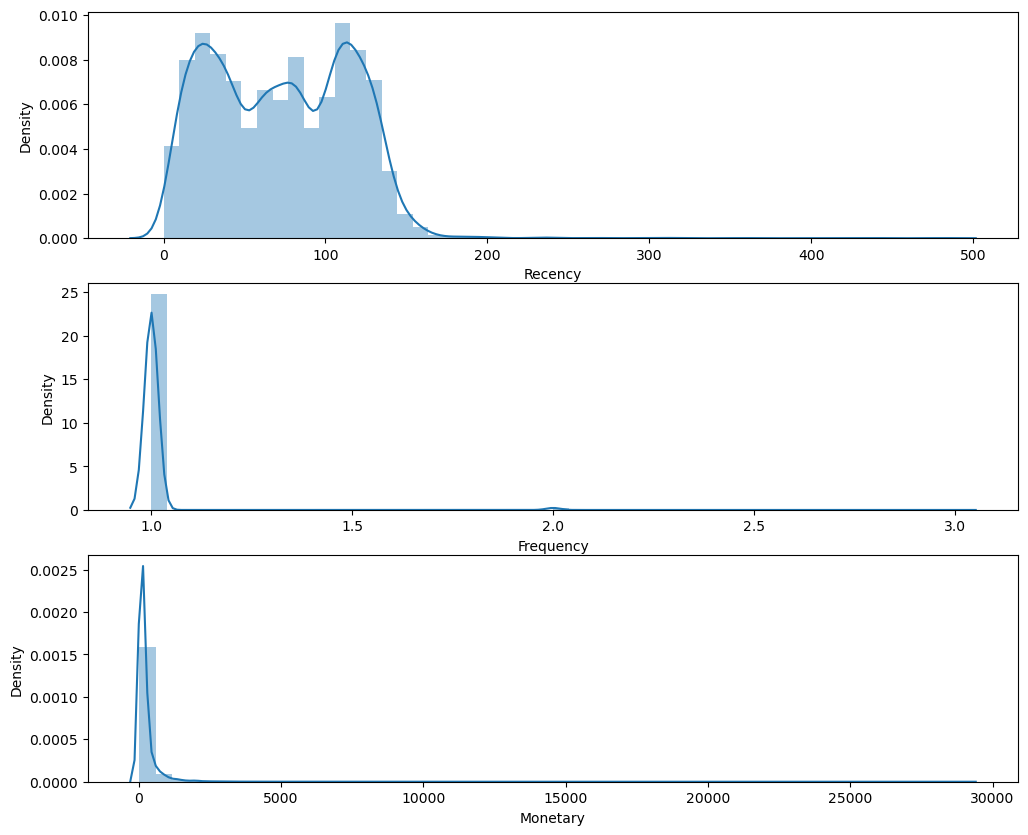

In [20]:
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1); sns.distplot(RFM_df['Recency'])
plt.subplot(3, 1, 2); sns.distplot(RFM_df['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(RFM_df['Monetary'])
plt.show()

In [ ]:
17. #kiểm tra lại thông tin tổng quan về DataFrame RFM_df
- RFM_df.info(): được sử dụng để hiển thị thông tin tổng quan về DataFrame RFM_df. Nó cung cấp các thông tin sau:
+ Số lượng dòng và cột trong DataFrame.
+ Mô tả loại dữ liệu (int, float, object, etc.) của mỗi cột
+ Số lượng giá trị không rỗng (non-null) trong mỗi cột. Giúp kiểm tra xem có bao nhiêu giá trị bị thiếu.
+ Tổng lượng bộ nhớ mà DataFrame đang sử dụng.
- giúp kiểm tra tình trạng của DataFrame, đảm bảo rằng các cột có kiểu dữ liệu đúng và không có giá trị thiếu.
Nó cũng cung cấp cái nhìn tổng quan về  DataFrame để bạn có thể tiếp tục thực hiện các phân tích.

In [21]:
RFM_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9333 entries, 0 to 9332
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  9333 non-null   object 
 1   Recency             9333 non-null   int64  
 2   Frequency           9333 non-null   int64  
 3   Monetary            9333 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 364.6+ KB


In [ ]:
18. 
- RFM_df2 = RFM_df.copy(): Tạo một bản sao (copy) của DataFrame RFM_df và gán nó vào biến RFM_df2. 
+ Điều này giúp đảm bảo rằng các thay đổi được thực hiện trên RFM_df2 không ảnh hưởng đến RFM_df.
- RFM_df2 = RFM_df2.set_index('customer_unique_id')
+ Đặt cột 'customer_unique_id' làm chỉ số (index) của DataFrame RFM_df2. 
+ Có nghĩa là 'customer_unique_id' sẽ không còn là một cột thông thường mà thay vào đó trở thành chỉ số của DataFrame.
- RFM_df2: In ra DataFrame RFM_df2 sau khi đã thay đổi. Bây giờ, 'customer_unique_id' là chỉ số chính của DataFrame.
+ RFM_df2 là một phiên bản mới của RFM_df với 'customer_unique_id' được đặt làm chỉ số.
- sử dụng tiếp để phân tích dễ dàng hơn 

In [22]:
RFM_df2= RFM_df.copy()
RFM_df2= RFM_df2.set_index('customer_unique_id')
RFM_df2

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
000ec5bff359e1c0ad76a81a45cb598f,8,1,27.75
00172711b30d52eea8b313a7f2cced02,32,1,122.07
001928b561575b2821c92254a2327d06,4,1,329.62
0019e8c501c85848ac0966d45226fa1d,120,1,197.27
...,...,...,...
ffeb904468642a1ce663a322629801cb,63,1,93.11
ffecceca389973ef16660d58696f281e,126,1,72.76
fff2ae16b99c6f3c785f0e052f2a9cfb,131,1,200.90


In [ ]:
19. #RFM Segments
- "RFM Segments" là kết quả của việc phân loại khách hàng dựa trên các giá trị Recency (R), Frequency (F), và Monetary (M) 
từ phân tích RFM. 
+ Mỗi segment đại diện cho một nhóm cụ thể của khách hàng có các đặc điểm tương tự về Recency, Frequency và Monetary.
Việc phân loại này giúp doanh nghiệp hiểu rõ hơn về hành vi mua sắm của khách hàng và có thể áp dụng các chiến lược tiếp thị
hoặc dịch vụ chăm sóc khách hàng tốt hơn cho từng nhóm.

In [ ]:
20. # gán điểm (scoring) cho các biến Recency, Frequency, và Monetary trong DataFrame RFM_df2 để tạo các điểm số (score)
#cho từng khách hàng.
- RFM_df2["recency_score"] = pd.qcut(RFM_df2['Recency'], 5, labels=[5, 4, 3, 2, 1]):
+ Sử dụng hàm `pd.qcut` để chia cột 'Recency' thành 5 khoảng (quantiles) bằng cách chia dữ liệu thành các khoảng 
có số lượng điểm số tương đương.
+ Labels được sử dụng để gán điểm số từ 1 đến 5 theo thứ tự giảm dần (càng gần thì điểm số càng cao). Có nghĩa là
những giá trị Recency gần nhất sẽ được gán điểm số cao nhất.
+ Kết quả là một cột mới 'recency_score' trong DataFrame RFM_df2, chứa điểm số cho mỗi khách hàng dựa trên Recency.

- RFM_df2["frequency_score"] = pd.qcut(RFM_df2['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5]):
+ Sử dụng hàm `pd.qcut` để chia cột 'Frequency' thành 5 khoảng bằng cách sử dụng hàm rank để xếp hạng dữ liệu và chia thành 
các khoảng có số lượng điểm số tương đương.
+ Labels được sử dụng để gán điểm số từ 1 đến 5 theo thứ tự tăng dần. Có nghĩa là những giá trị Frequency cao nhất sẽ được gán 
điểm số cao nhất.
+ Kết quả là một cột mới 'frequency_score' trong DataFrame RFM_df2, chứa điểm số cho mỗi khách hàng dựa trên Frequency.

- RFM_df2["monetary_score"] = pd.qcut(RFM_df2['Monetary'], 5, labels=[1, 2, 3, 4, 5]):
+ Sử dụng hàm `pd.qcut` để chia cột 'Monetary' thành 5 khoảng bằng cách chia dữ liệu thành các khoảng có số lượng điểm số 
tương đương.
+ Labels được sử dụng để gán điểm số từ 1 đến 5 theo thứ tự tăng dần. Điều này có nghĩa là những giá trị Monetary cao nhất 
sẽ được gán điểm số cao nhất.
+ Kết quả là một cột mới 'monetary_score' trong DataFrame RFM_df2, chứa điểm số cho mỗi khách hàng dựa trên Monetary.

Tóm lại, code dưới sẽ tạo ra ba cột mới ('recency_score', 'frequency_score', 'monetary_score') trong DataFrame RFM_df2, 
chứa điểm số tương ứng cho Recency, Frequency, và Monetary dựa trên việc chia dữ liệu thành các khoảng có số điểm số tương đương.
Điều này giúp phân loại và đánh giá khách hàng theo các nhóm có tính chất RFM tương tự.

In [23]:
RFM_df2["recency_score"]  = pd.qcut(RFM_df2['Recency'], 5, labels=[5, 4, 3, 2, 1])
RFM_df2["frequency_score"]= pd.qcut(RFM_df2['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
RFM_df2["monetary_score"] = pd.qcut(RFM_df2['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [ ]:
21. #tạo một cột mới là 'RFM_SCORE'. Cột này được tạo bằng cách kết hợp giá trị từ ba cột 'recency_score',
#'frequency_score', và 'monetary_score'.
- 'RFM_SCORE'`: Tên của cột mới.
- RFM_df2.recency_score.astype(str): Chuyển đổi giá trị trong cột 'recency_score' thành kiểu dữ liệu chuỗi (string).
- RFM_df2.frequency_score.astype(str): Chuyển đổi giá trị trong cột 'frequency_score' thành kiểu dữ liệu chuỗi (string).
- RFM_df2.monetary_score.astype(str)`: Chuyển đổi giá trị trong cột 'monetary_score' thành kiểu dữ liệu chuỗi (string).
- '+': Dấu cộng được sử dụng để nối các chuỗi lại với nhau.

- RFM_df2['RFM_SCORE']` là cột mới chứa chuỗi kết hợp từ giá trị của 'recency_score', 'frequency_score', và 'monetary_score'. 
Ví dụ, nếu 'recency_score' là 4, 'frequency_score' là 2, và 'monetary_score' là 5, thì 'RFM_SCORE' sẽ là chuỗi '425'.
- Cột 'RFM_SCORE'được sử dụng để định rõ hơn các nhóm khách hàng 

In [24]:
RFM_df2['RFM_SCORE'] = RFM_df2.recency_score.astype(str)+ RFM_df2.frequency_score.astype(str) + RFM_df2.monetary_score.astype(str)
RFM_df2

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,2,1,3,213
000ec5bff359e1c0ad76a81a45cb598f,8,1,27.75,5,1,1,511
00172711b30d52eea8b313a7f2cced02,32,1,122.07,4,1,3,413
001928b561575b2821c92254a2327d06,4,1,329.62,5,1,5,515
0019e8c501c85848ac0966d45226fa1d,120,1,197.27,1,1,4,114
...,...,...,...,...,...,...,...
ffeb904468642a1ce663a322629801cb,63,1,93.11,3,5,2,352
ffecceca389973ef16660d58696f281e,126,1,72.76,1,5,2,152
fff2ae16b99c6f3c785f0e052f2a9cfb,131,1,200.90,1,5,4,154


In [ ]:
22. #định nghĩa (`seg_map`) 
- định nghĩa (`seg_map`)  để ánh xạ các chuỗi giá trị RFM_SCORE thành các nhóm khách hàng cụ thể.
+ Mỗi key của từ điển là một biểu thức chính quy (regular expression) biểu diễn một nhóm cụ thể của các điểm RFM_SCORE,
và giá trị tương ứng là tên của nhóm khách hàng đó.
+ Dưới đây là giải thích cụ thể cho từng nhóm trong từ điển `seg_map`:

1. '111|112|121|131|141|151': 'Lost customers'`: Khách hàng đã mất 
        
2. '332|322|233|232|223|222|132|123|122|212|211': 'Hibernating customers'`: Khách hàng đang ngủ đông 
        
3. '155|154|144|214|215|115|114|113': 'Cannot Lose Them'`: Khách hàng không thể mất

4. '255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk'`: Khách hàng có rủi ro

5. '331|321|312|221|213|231|241|251': 'About To Sleep'`: Sắp ngủ đông

6. '535|534|443|434|343|334|325|324': 'Need Attention'`: Cần chú ý 

7. '525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising'`: Đầy hứa hẹn

8. '512|511|422|421|412|411|311': 'New Customers'`: Khách hàng mới 

9. '553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalist'`:
Tiềm năng trở thành khách hàng trung thành
10. '543|444|435|355|354|345|344|335': 'Loyal'`: Khách hàng trung thành

11. '555|554|544|545|454|455|445': 'Champions'`: Những nhà vô địch -

- mỗi nhóm được xác định dựa trên một phạm vi cụ thể của giá trị RFM_SCORE, và mỗi nhóm có tên mô tả đặc điểm chung 
của khách hàng trong nhóm đó.

In [25]:
seg_map= {
    r'111|112|121|131|141|151': 'Lost customers',
    r'332|322|233|232|223|222|132|123|122|212|211': 'Hibernating customers', 
    r'155|154|144|214|215|115|114|113': 'Cannot Lose Them',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk',
    r'331|321|312|221|213|231|241|251': 'About To Sleep',
    r'535|534|443|434|343|334|325|324': 'Need Attention',
    r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising',
    r'512|511|422|421|412|411|311': 'New Customers',
    r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalist',
    r'543|444|435|355|354|345|344|335': 'Loyal',
    r'555|554|544|545|454|455|445': 'Champions'
}

In [ ]:
23. #tạo cột mới 'Segment' trong DataFrame RFM_df2.
- RFM_df2['Segment'] = RFM_df2['recency_score'].astype(str) + RFM_df2['frequency_score'].astype(str) + RFM_df2['monetary_score'].astype(str)
+ Tạo một cột mới 'Segment' bằng cách kết hợp giá trị từ ba cột 'recency_score', 'frequency_score', và 'monetary_score'. 
+ Kết quả là một chuỗi đại diện cho RFM_SCORE của mỗi khách hàng.
- RFM_df2['Segment'] = RFM_df2['Segment'].replace(seg_map, regex=True):
+ Thực hiện thay thế giá trị trong cột 'Segment' dựa trên từ điển seg_map. Mỗi giá trị RFM_SCORE sẽ được thay thế
bằng tên của nhóm khách hàng tương ứng trong từ điển. Điều này giúp tạo ra cột 'Segment' có ý nghĩa hơn thể hiện
nhóm khách hàng mà mỗi khách hàng thuộc về.
- RFM_df2.head(): Hiển thị năm dòng đầu tiên của DataFrame RFM_df2 sau khi đã thêm cột 'Segment'.
- Kết quả: DataFrame `RFM_df2` được mở rộng thêm một cột 'Segment' mới, trong đó mỗi khách hàng được gán một nhãn phân loại
dựa trên RFM_SCORE.

In [26]:
RFM_df2['Segment'] = RFM_df2['recency_score'].astype(str) + RFM_df2['frequency_score'].astype(str) + RFM_df2['monetary_score'].astype(str)
RFM_df2['Segment'] = RFM_df2['Segment'].replace(seg_map, regex=True)
RFM_df2.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,Segment
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,2,1,3,213,About To Sleep
000ec5bff359e1c0ad76a81a45cb598f,8,1,27.75,5,1,1,511,New Customers
00172711b30d52eea8b313a7f2cced02,32,1,122.07,4,1,3,413,Promising
001928b561575b2821c92254a2327d06,4,1,329.62,5,1,5,515,Promising
0019e8c501c85848ac0966d45226fa1d,120,1,197.27,1,1,4,114,Cannot Lose Them


In [ ]:
24. 
- RFM_df2['Segment'].unique() được sử dụng để trích xuất giá trị duy nhất (unique values) từ cột 'Segment' trong 
DataFrame RFM_df2.
+ RFM_df2['Segment']`: Truy cập cột 'Segment' trong DataFrame RFM_df2.
+ unique(): Trả về một mảng chứa tất cả các giá trị duy nhất có trong cột 'Segment'.
- Điều này giúp xem xét các nhóm khách hàng cụ thể nào đã được tạo ra từ phân loại dựa trên RFM_SCORE và từ từ điển `seg_map`. 
- Kết quả sẽ là một mảng chứa các nhóm khách hàng duy nhất có trong dữ liệu.

- Ví dụ, nếucó nhóm "Champions", "Loyal", "Promising", và "New Customers", thì kết quả của RFM_df2['Segment'].unique() 
sẽ là một mảng chứa các chuỗi tương ứng với những nhóm này.

In [27]:
RFM_df2['Segment'].unique()

array(['About To Sleep', 'New Customers', 'Promising', 'Cannot Lose Them',
       'Hibernating customers', 'Lost customers', 'Champions', 'At Risk',
       'Potential Loyalist', 'Loyal', 'Need Attention'], dtype=object)

In [ ]:
25.
- RFM_df2['Segment'].nunique() sử dụng để đếm số lượng giá trị duy nhất (number of unique values) trong cột 'Segment' 
của DataFrame `RFM_df2`. 
- tương tự như trên nhưng thay vì đưa ra các phân loại cụ thể như unique thì nunique sẽ đưa ra số lượng giá trị duy nhất có 
trong cột 'segment'
+  .nunique()`: Trả về số lượng giá trị duy nhất có trong cột 'Segment'.

- Kết quả RFM_df2['Segment'].nunique() là một số, thể hiện số lượng nhóm khách hàng duy nhất mà bạn đã phân loại.

In [28]:
RFM_df2['Segment'].nunique()

11

In [ ]:
26. ##phân nhóm dữ liệu trong DataFrame `RFM_df2` dựa trên cột 'Segment', sau đó tính toán các thống kê mô tả 
#(mean, median, min, max, count) cho các biến Recency, Frequency, và Monetary trong từng nhóm khách hàng.
- RFM_df2[["Segment", "Recency", "Frequency", "Monetary"]]`:
+ Chọn ra các cột cần thiết từ DataFrame RFM_df2, bao gồm cột 'Segment' cùng với các cột Recency, Frequency, và Monetary.
- .groupby("Segment"): Nhóm dữ liệu theo giá trị trong cột 'Segment', tạo ra các nhóm dữ liệu cho mỗi nhóm khách hàng.
- `.agg(['mean', 'median', 'min', 'max', 'count']): Áp dụng các hàm tổng hợp (aggregate) như trung bình (mean),
trung vị (median), giá trị nhỏ nhất (min), giá trị lớn nhất (max), và số lượng phần tử (count) cho mỗi biến
Recency, Frequency, và Monetary trong từng nhóm.
- RFMStats: Lưu trữ kết quả vào DataFrame mới có tên là RFMStats.

- Kết quả: RFMStats sẽ là một bảng thống kê mô tả cho từng biến (Recency, Frequency, Monetary) trong mỗi nhóm khách hàng,
giúp hiểu rõ hơn về đặc điểm và hành vi mua sắm của từng nhóm khách hàng.

In [29]:
RFMStats = RFM_df2[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(['mean','median', 'min', 'max', 'count'])
RFMStats

Recency                        Frequency             \
                             mean median  min  max count      mean median min   
Segment                                                                         
About To Sleep          91.675127   95.0   59  115   591  1.001692    1.0   1   
At Risk                116.162048  114.0   87  358  1660  1.012651    1.0   1   
Cannot Lose Them       123.725522  123.0   87  481   623  1.009631    1.0   1   
Champions               28.232000   27.0    0   58   500  1.088000    1.0   1   
Hibernating customers  106.001267  106.0   59  439   789  1.000000    1.0   1   
Lost customers         129.985149  127.0  116  259   404  1.000000    1.0   1   
Loyal                   59.349481   65.0    0   86   578  1.024221    1.0   1   
Need Attention          50.870175   56.0    0   86   570  1.000000    1.0   1   
New Customers           39.005535   37.0    0   86   542  1.000000    1.0   1   
Potential Loyalist      41.639805   38.0    0   86  1849  1.009194    1.0   1   
Promising               35.971475   29.0    0   86  1227  1.000000    1.0   1   

                                   Monetary                                   
                      max count        mean   median     min       max count  
Segment                                                                       
About To Sleep          2   591   56.405262   47.530   14.38    150.60   591  
At Risk                 3  1660  376.492669  180.170   59.22  19457.04  1660  
Cannot Lose Them        2   623  433.820353  215.270   98.43  19174.38   623  
Champions               3   500  448.646360  312.925  151.42   5948.36   500  
Hibernating customers   1   789   88.238314   86.420   16.29    151.33   789  
Lost customers          1   404   48.506584   47.230   17.29     97.38   404  
Loyal                   2   578  549.842872  267.860   98.56  29099.52   578  
Need Attention          1   570  302.168316  186.820   98.65   5398.75   570  
New Customers           1   542   57.508506   55.005   14.29     98.26   542  
Potential Loyalist      2  1849   80.308183   76.580   13.89    151.14  1849  
Promising               1  1227  310.279250  181.690   18.70  11468.45  1227

In [ ]:
27. #tính toán tỷ lệ phần trăm của số lượng khách hàng trong mỗi nhóm (`Monetary`) so với tổng số lượng khách hàng.
- RFMStats['Monetary']["count"]: Truy cập cột "count" (số lượng) của nhóm "Monetary" trong DataFrame RFMStats. 
+ Đây là số lượng khách hàng trong từng nhóm.
- RFMStats['Monetary']["count"].sum(): Tính tổng số lượng khách hàng trong tất cả các nhóm "Monetary".
- (100*RFMStats['Monetary']["count"]/RFMStats['Monetary']["count"].sum())`: Tính toán tỷ lệ phần trăm cho mỗi nhóm "Monetary" 
bằng cách chia số lượng khách hàng trong mỗi nhóm cho tổng số lượng khách hàng và nhân với 100.
-.round(2`: Làm tròn đến hai chữ số thập phân.
- RFMStats['Ratio']: Tạo một cột mới có tên "Ratio" trong DataFrame RFMStats để lưu trữ tỷ lệ phần trăm.

- Kết quả: DataFrame RFMStats được mở rộng thêm một cột mới "Ratio," chứa tỷ lệ phần trăm của số lượng khách hàng trong 
mỗi nhóm "Monetary" so với tổng số lượng khách hàng. 
+ Điều này giúp hiểu rõ hơn về đóng góp tương đối của mỗi nhóm khách hàng vào tổng lượng mua sắm.

In [30]:
RFMStats['Ratio']= (100*RFMStats['Monetary']["count"]/RFMStats['Monetary']["count"].sum()).round(2)
RFMStats

Recency                        Frequency             \
                             mean median  min  max count      mean median min   
Segment                                                                         
About To Sleep          91.675127   95.0   59  115   591  1.001692    1.0   1   
At Risk                116.162048  114.0   87  358  1660  1.012651    1.0   1   
Cannot Lose Them       123.725522  123.0   87  481   623  1.009631    1.0   1   
Champions               28.232000   27.0    0   58   500  1.088000    1.0   1   
Hibernating customers  106.001267  106.0   59  439   789  1.000000    1.0   1   
Lost customers         129.985149  127.0  116  259   404  1.000000    1.0   1   
Loyal                   59.349481   65.0    0   86   578  1.024221    1.0   1   
Need Attention          50.870175   56.0    0   86   570  1.000000    1.0   1   
New Customers           39.005535   37.0    0   86   542  1.000000    1.0   1   
Potential Loyalist      41.639805   38.0    0   86  1849  1.009194    1.0   1   
Promising               35.971475   29.0    0   86  1227  1.000000    1.0   1   

                                   Monetary                                   \
                      max count        mean   median     min       max count   
Segment                                                                        
About To Sleep          2   591   56.405262   47.530   14.38    150.60   591   
At Risk                 3  1660  376.492669  180.170   59.22  19457.04  1660   
Cannot Lose Them        2   623  433.820353  215.270   98.43  19174.38   623   
Champions               3   500  448.646360  312.925  151.42   5948.36   500   
Hibernating customers   1   789   88.238314   86.420   16.29    151.33   789   
Lost customers          1   404   48.506584   47.230   17.29     97.38   404   
Loyal                   2   578  549.842872  267.860   98.56  29099.52   578   
Need Attention          1   570  302.168316  186.820   98.65   5398.75   570   
New Customers           1   542   57.508506   55.005   14.29     98.26   542   
Potential Loyalist      2  1849   80.308183   76.580   13.89    151.14  1849   
Promising               1  1227  310.279250  181.690   18.70  11468.45  1227   

                       Ratio  
                              
Segment                       
About To Sleep          6.33  
At Risk                17.79  
Cannot Lose Them        6.68  
Champions               5.36  
Hibernating customers   8.45  
Lost customers          4.33  
Loyal                   6.19  
Need Attention          6.11  
New Customers           5.81  
Potential Loyalist     19.81  
Promising              13.15

In [ ]:
28. #vẽ biểu đồ thanh (bar plot) biểu diễn phân phối của các nhóm khách hàng dựa trên tỷ lệ phần trăm (Ratio).
- plt.figure(figsize=(20,8)): Đặt kích thước của hình vẽ là 20x8 inches.
- per = sns.barplot(x=RFMStats['Ratio'], y=RFMStats.index, data=RFMStats, palette="viridis"): Tạo biểu đồ thanh sử dụng seaborn.
Trục x chứa dữ liệu về tỷ lệ phần trăm (Ratio), trục y chứa tên của các nhóm khách hàng (index) từ DataFrame `RFMStats`.
Màu sắc của thanh được chọn từ bảng màu "viridis".
- sns.despine(bottom=True, left=True): Loại bỏ các đường biên không cần thiết ở phía dưới và bên trái của biểu đồ.
- for i, v in enumerate(RFMStats['Ratio']): Duyệt qua từng giá trị trong cột "Ratio" để thêm chú thích (annotation) lên biểu đồ.
- per.text(v, i + 0.20, "{:.2f}".format(v) + "%", color='black', ha="left"): Thêm chú thích lên thanh biểu đồ với giá trị
của tỷ lệ phần trăm, được làm tròn đến hai chữ số thập phân.
- per.set_ylabel('Segments', fontsize=25): Đặt nhãn cho trục y là "Segments" với kích thước font là 25.
- per.set(xticks=[]): Ẩn các điểm đánh dấu trên trục x để giảm clutter.
- plt.title('Distribution of Segments', fontsize=35): Đặt tiêu đề cho biểu đồ với kích thước font là 35.
- plt.show(): Hiển thị biểu đồ.

- Kết quả: một biểu đồ thanh thể hiện phân phối của các nhóm khách hàng dựa trên tỷ lệ phần trăm trong toàn bộ tập dữ liệu. 
Các thanh biểu diễn các nhóm khách hàng và chiều dài của mỗi thanh thể hiện tỷ lệ phần trăm của nhóm đó trong tổng số lượng
khách hàng. 

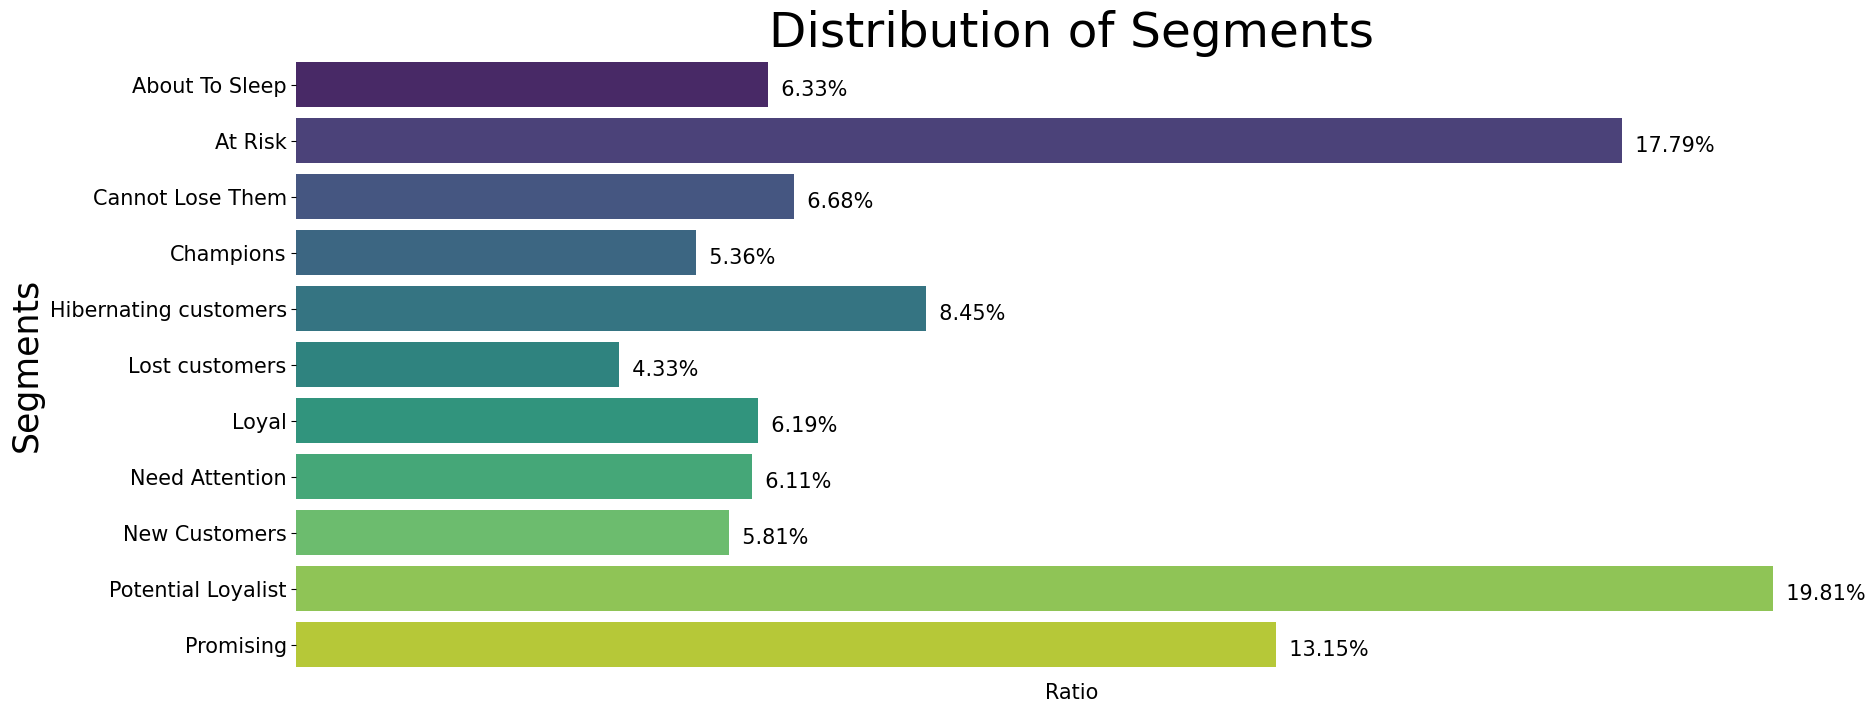

In [33]:
plt.figure(figsize=(20,8))
#plt.rc('font', size=20)
per= sns.barplot(x=RFMStats['Ratio'], y=RFMStats.index, data=RFMStats, palette="viridis")
sns.despine(bottom = True, left = True)
for i, v in enumerate(RFMStats['Ratio']):
    per.text(v, i+.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
per.set_ylabel('Segments', fontsize=25)
per.set(xticks=[])
plt.title('Distribution of Segments', fontsize=35)
plt.show()

In [ ]:
29. # cài đặt thư viên squarify để tạo biểu đồ treemap.
- biểu đồ treemap để khiến cho việc hiển thị phân phối của các nhóm khách hàng hoặc các giá trị khác trong một tập dữ liệu trở
nên trực quan và dễ nhận biết hơn.

In [60]:
!pip install squarify

In [ ]:
30. # Treemap by recency/frequency
- vẽ biểu đồ treemap, thể hiện phân phối của các nhóm khách hàng dựa trên số lượng (count) của mỗi nhóm trong các biến 
Recency và Frequency.
- plt.figure(figsize=(15,8)): Đặt kích thước của hình vẽ là 15x8 inches.
- plt.rc('font', size=15): Đặt kích thước của font chữ trong biểu đồ là 15.
- squarify.plot(sizes=RFMStats["Recency"]["count"], label=RFMStats.index, color=["red", "orange", "blue", "forestgreen", "yellow", "purple", "cornsilk", "royalblue", "pink", "brown"], alpha=.55):
+ Sử dụng thư viện `squarify` để vẽ biểu đồ treemap.Kích thước của mỗi hình vuông trong treemap được xác định bởi số lượng 
(count) của mỗi nhóm trong biến Recency. Màu sắc của từng hình vuông được xác định bởi danh sách màu lựa chọn. 
+ 'alpha' đặt độ trong suốt cho các hình vuông.
- plt.suptitle("Recency and Frequency Grid", fontsize=25): Đặt tiêu đề cho biểu đồ treemap với kích thước font là 25.

- Kết quả:một biểu đồ treemap thể hiện mức độ phân phối của các nhóm khách hàng dựa trên số lượng (count) của mỗi nhóm 
trong biến Recency và Frequency. Mỗi hình vuông trong treemap biểu thị một nhóm khách hàng, với kích thước của hình vuông 
thể hiện số lượng khách hàng trong nhóm đó. Màu sắc của các hình vuông được sử dụng để phân biệt giữa các nhóm khách hàng.

Text(0.5, 0.98, 'Recency and Frequency Grid')

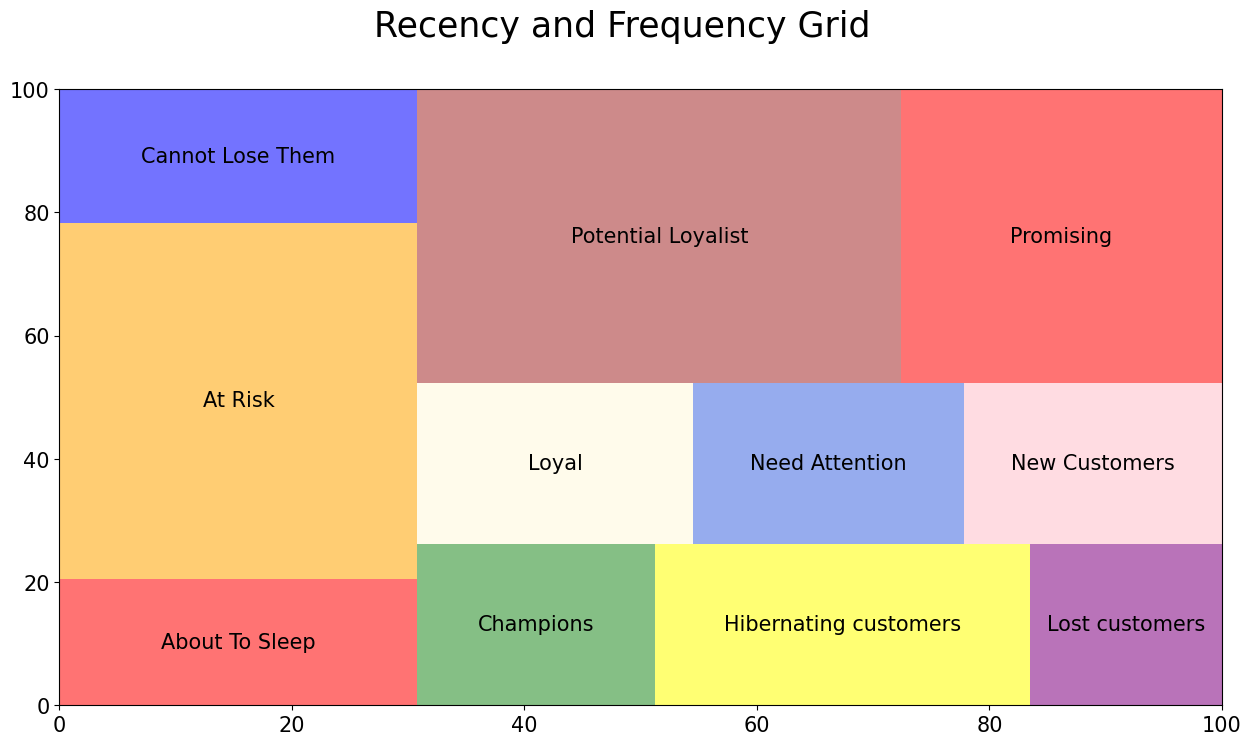

In [35]:
import squarify
plt.figure(figsize=(15,8))
plt.rc('font', size=15)
squarify.plot(sizes=RFMStats["Recency"]["count"], label=RFMStats.index, 
              color=["red","orange","blue", "forestgreen", "yellow", "purple", "cornsilk","royalblue", "pink", "brown"], alpha=.55)
plt.suptitle("Recency and Frequency Grid", fontsize=25)

# Clustering with K-Means

In [ ]:
31. #tạo DataFrame mới RFM_df3
- tạo DataFrame mới RFM_df3 bằng cách loại bỏ một số cột không cần thiết từ DataFrame gốc RFM_df2 Cụ thể:
- RFM_df2.drop(["recency_score", "frequency_score", "monetary_score", "RFM_SCORE", "Segment"], axis=1):
+ Sử dụng phương thức drop để loại bỏ các cột được liệt kê từ DataFrame RFM_df2. 
+ Các cột bị loại bỏ bao gồm "recency_score", "frequency_score", "monetary_score", "RFM_SCORE", và "Segment".
- RFM_df3: Gán kết quả vào DataFrame mới có tên là RFM_df3.

- Kết quả: RFM_df3 là một phiên bản mới của DataFrame RFM_df2 mà không chứa các cột đã được loại bỏ.
Dữ liệu và muốn giữ lại các cột quan trọng hoặc giảm kích thước của DataFrame

In [36]:
RFM_df3= RFM_df2.drop(["recency_score", "frequency_score", "monetary_score", "RFM_SCORE", "Segment"], axis=1)
RFM_df3

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
000ec5bff359e1c0ad76a81a45cb598f,8,1,27.75
00172711b30d52eea8b313a7f2cced02,32,1,122.07
001928b561575b2821c92254a2327d06,4,1,329.62
0019e8c501c85848ac0966d45226fa1d,120,1,197.27
...,...,...,...
ffeb904468642a1ce663a322629801cb,63,1,93.11
ffecceca389973ef16660d58696f281e,126,1,72.76
fff2ae16b99c6f3c785f0e052f2a9cfb,131,1,200.90


In [ ]:
32.1 #kiểm tra độ chệch của một cột trong DataFrame.
- from scipy import stats: Import thư viện scipy.stats để sử dụng các hàm thống kê, trong trường hợp này là skew và skewtest.
- def check_skew(df, column): Định nghĩa hàm check_skew nhận vào hai đối số: DataFrame (df) và tên cột cần kiểm tra (column).
- skew = stats.skew(df[column]): Tính toán độ chệch (skewness) của cột bằng hàm skew từ thư viện scipy.stats.
- skewtest = stats.skewtest(df[column]): Thực hiện kiểm định skewness bằng hàm skewtest.
- plt.title('Distribution of ' + column): Đặt tiêu đề cho biểu đồ phân phối với tên cột
- sns.distplot(df[column]): Vẽ biểu đồ phân phối của cột sử dụng seaborn.
- plt.show(): Hiển thị biểu đồ.
- print("{}'s: Skew: {}, : {}".format(column, skew, skewtest)): In ra giá trị skewness và kết quả kiểm định skewness.
- return: Trả về kết quả.

- sử dụng để kiểm tra xem phân phối của một cột có độ chệch không (skewed) và cung cấp thông tin về độ chệch và kết quả 
kiểm định skewness. 
+ Skewness là một độ đo cho biết mức độ đối xứng của phân phối:
+ Nếu giá trị skewness gần 0, phân phối gần với đối xứng
+ nếu skewness lớn hơn 0, phân phối lệch về phải (positive skewness);
+ nếu skewness nhỏ hơn 0, phân phối lệch về trái (negative skewness).

In [37]:
#check if data is skewed
from scipy import stats #library
def check_skew(df, column):
    skew = stats.skew(df[column])
    skewtest = stats.skewtest(df[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df[column])
    plt.show()
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

In [ ]:
32.2#kiểm tra độ chệch của một cột trong DataFrame FM_df3.
- check_skew: Gọi hàm check_skew.
- RFM_df3: Truyền vào DataFrame RFM_df3 làm đối số đầu tiên. Đây là DataFrame muốn kiểm tra độ chệch của cột.
- col: Truyền vào tên cột (col) muốn kiểm tra độ chệch.

- Hàm này sẽ vẽ biểu đồ phân phối của cột đã chọn và in ra thông tin về độ chệch và kết quả kiểm định skewness của cột đó.
Điều này sẽ giúp đánh giá mức độ đối xứng của phân phối và xác định xem cột đó có chệch hay không.

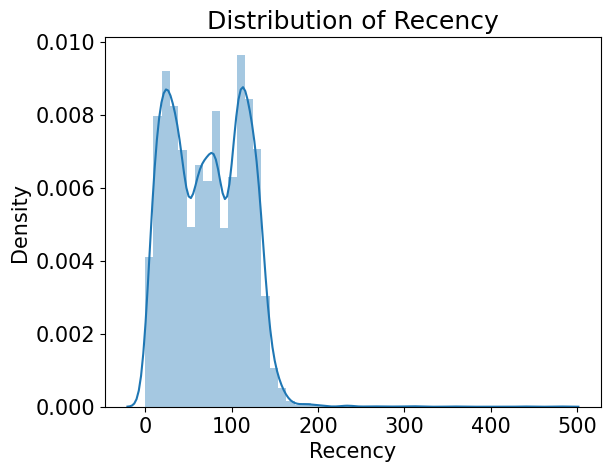

Recency's: Skew: 0.3390555571522835, : SkewtestResult(statistic=13.026296934670588, pvalue=8.671504578917153e-39)


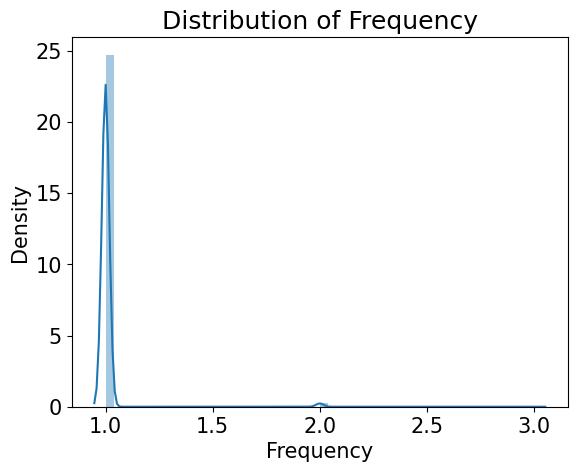

Frequency's: Skew: 10.34835150768159, : SkewtestResult(statistic=104.32160208811939, pvalue=0.0)


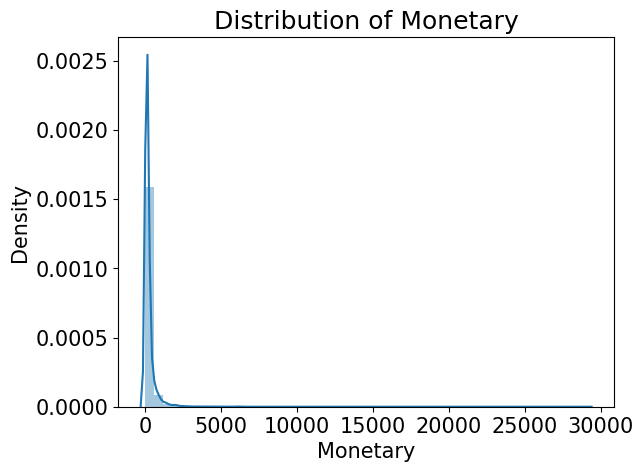

Monetary's: Skew: 20.56920879070542, : SkewtestResult(statistic=126.45061311574032, pvalue=0.0)


In [38]:
for col in RFM_df3.columns:
    check_skew(RFM_df3, col)

In [ ]:
32.3 #nhận xét
- Kết quả cột "Recency" là:
+ Độ chệch (Skewness):có giá trị dương (0.339), chỉ ra rằng phân phối lệch về bên phải (positive skewness). 
Tức là một số quan sát có giá trị thấp hơn trung bình, và phân phối có xu hướng kéo dài về bên phải.
+ Kết quả kiểm định skewness (skewtest):Giá trị p-value rất nhỏ (8.671504578917153e-39), nghĩa là có đủ bằng chứng để bác bỏ 
giả thuyết null rằng phân phối là đối xứng (skewness bằng 0). Vì vậy, kết luận là có sự chệch lệch đáng kể và phân phối 
không đối xứng.
- Dựa trên các giá trị này, có thể kết luận rằng cột "Recency" trong DataFrame RFM_df3 có độ chệch và là một phân phối
không đối xứng.

- Kết quả cho cột "Frequency" là:
+ Độ chệch (Skewness): Skewness có giá trị dương rất lớn (10.35), chỉ ra rằng phân phối lệch về bên phải (positive skewness) một 
cách rất mạnh.Tức là có một số quan sát có giá trị cao hơn trung bình, và phân phối có xu hướng kéo dài về bên phải.
+ Kết quả kiểm định skewness (skewtest): Giá trị p-value là 0.0, đồng nghĩa với việc có đủ bằng chứng để bác bỏ giả thuyết 
null rằng phân phối là đối xứng (skewness bằng 0). Vì vậy, kết luận là có sự chệch lệch rất mạnh và phân phối không đối xứng.
- Dựa trên các giá trị này, có thể kết luận rằng cột "Frequency" trong DataFrame có độ chệch rất mạnh và là một 
phân phối không đối xứng. 

-Kết quả cho cột "Monetary" là:
+ Độ chệch (Skewness):=có giá trị dương (0.751), chỉ ra rằng phân phối lệch về bên phải (positive skewness).
Tức là có một số quan sát có giá trị cao hơn trung bình, và phân phối có xu hướng kéo dài về bên phải.
+ kết quả kiểm định skewness (skewtest): Giá trị p-value rất nhỏ (3.1773250347242865e-155), nghĩa là có đủ bằng chứng để bác bỏ
giả thuyết null rằng phân phối là đối xứng (skewness bằng 0). Vì vậy, kết luận là có sự chệch lệch và phân phối không đối xứng.
- Dựa trên các giá trị này, có thể kết luận rằng cột "Monetary" trong DataFrame có độ chệch và là một phân phối không đối xứng.

In [ ]:
33. #tạo một bản sao của DataFrame RFM_df3  là `RFM_log`,áp dụng phép biến đổi log10 cho tất cả các giá trị 
- RFM_log= RFM_df3.copy(): Tạo bản sao của DataFrame RFM_df3 có tên là RFM_log.
- for i in RFM_log.columns[1:]: Duyệt qua các cột của DataFrame bắt đầu từ cột thứ hai (index 1) đến cuối cùng.
- RFM_log[i] = np.log10(RFM_log[i]): Áp dụng phép biến đổi log10 cho tất cả các giá trị trong cột được chọn (i). 
Phép biến đổi log10 thường được sử dụng để làm giảm độ chệch của dữ liệu và làm cho phân phối trở nên đối xứng hơn.

- Kết quả: RFM_log - một phiên bản mới của DataFrame RFM_df3 trong đó các giá trị của các cột đã được chuyển đổi bằng log10. 
Việc này có thể hữu ích khi áp dụng các phương pháp và mô hình yêu cầu dữ liệu có phân phối đối xứng hơn.

In [39]:
RFM_log= RFM_df3.copy()
for i in RFM_log.columns[1:]:
    RFM_log[i] = np.log10(RFM_log[i])

RFM_log

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,0.0,2.151982
000ec5bff359e1c0ad76a81a45cb598f,8,0.0,1.443263
00172711b30d52eea8b313a7f2cced02,32,0.0,2.086609
001928b561575b2821c92254a2327d06,4,0.0,2.518014
0019e8c501c85848ac0966d45226fa1d,120,0.0,2.295061
...,...,...,...
ffeb904468642a1ce663a322629801cb,63,0.0,1.968996
ffecceca389973ef16660d58696f281e,126,0.0,1.861893
fff2ae16b99c6f3c785f0e052f2a9cfb,131,0.0,2.302980


In [ ]:
34. #kiểm tra độ chệch của một cột trong DataFrame RFM_log.

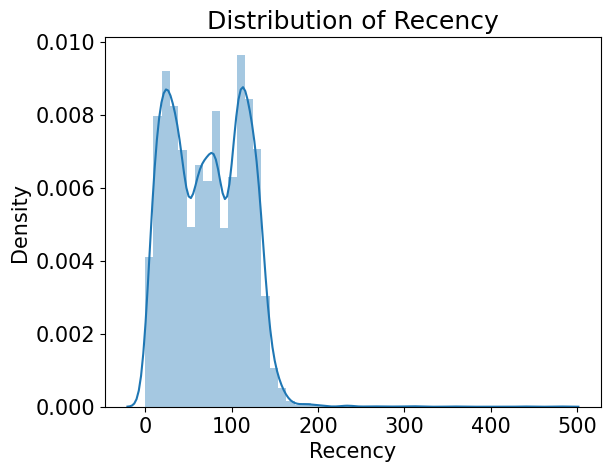

Recency's: Skew: 0.3390555571522835, : SkewtestResult(statistic=13.026296934670588, pvalue=8.671504578917153e-39)


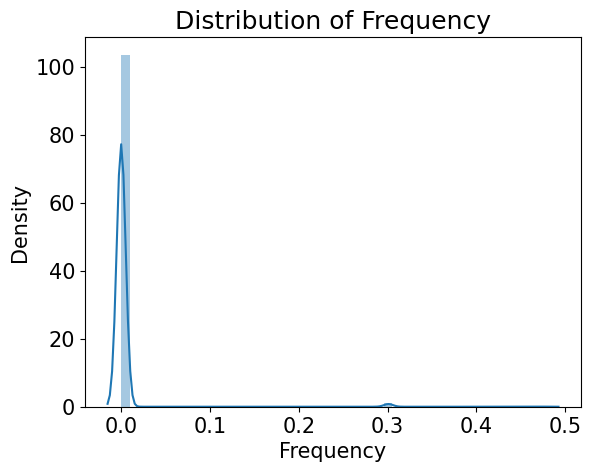

Frequency's: Skew: 9.801873319074893, : SkewtestResult(statistic=102.57673072385273, pvalue=0.0)


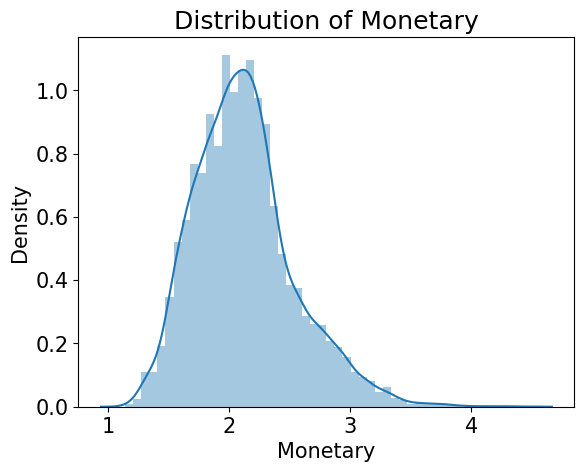

Monetary's: Skew: 0.7508728956678877, : SkewtestResult(statistic=26.54199373691504, pvalue=3.1773250347242865e-155)


In [40]:
for col in RFM_log.columns:
    check_skew(RFM_log, col)

In [ ]:
35.#nhận xét Kết quả sau khi áp dụng biến đổi log10 
Mặc dù biến đổi log10 có thể giảm đi đôi chút độ chệch, nhưng trong các trường hợp này, vẫn còn một số độ chệch. 

In [ ]:
36.#chuẩn hóa dữ liệu sử dụng phương pháp StandardScaler từ thư viện scikit-learn.
- `from sklearn.preprocessing import StandardScaler: 'Import class StandardScaler từ module sklearn.preprocessing'.
- scaler= StandardScaler(): Tạo một đối tượng của StandardScaler để thực hiện chuẩn hóa.
- RFM_log_scaled= scaler.fit_transform(RFM_log): Áp dụng phương pháp fit_transform của StandardScaler để chuẩn hóa dữ liệu 
trong DataFrame RFM_log. Điều này bao gồm việc tính toán giá trị trung bình và độ lệch chuẩn của mỗi cột và sau đó thực hiện 
chuẩn hóa dữ liệu dựa trên các giá trị này.
- RFM_log_scaled_df= pd.DataFrame(RFM_log_scaled): Tạo một DataFrame mới (RFM_log_scaled_df) từ dữ liệu đã được chuẩn hóa.
- RFM_log_scaled_df.columns = ['recency', 'frequency', 'monetary']: Đặt tên cho các cột của DataFrame mới.
- RFM_log_scaled_df.head(): Hiển thị năm dòng đầu tiên của DataFrame đã được chuẩn hóa.

- Kết quả: RFM_log_scaled_df là một DataFrame mới chứa dữ liệu đã được chuẩn hóa, với các cột có giá trị trung bình gần 0 
và độ lệch chuẩn gần 1. Chuẩn hóa dữ liệu có thể giúp đảm bảo rằng các biến có thang đo khác nhau được đồng nhất, giúp mô 
hình ML hoặc các phương pháp thống kê hoạt động hiệu quả hơn.

In [41]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

RFM_log_scaled= scaler.fit_transform(RFM_log)
RFM_log_scaled_df= pd.DataFrame(RFM_log_scaled)
RFM_log_scaled_df.columns = ['recency', 'frequency', 'monetary']
RFM_log_scaled_df.head()

,recency,frequency,monetary
0,0.896977,-0.102887,0.066981
1,-1.524851,-0.102887,-1.638392
2,-0.960542,-0.102887,-0.090325
3,-1.618903,-0.102887,0.947752
4,1.108593,-0.102887,0.411267


In [ ]:
37.#kiểm tra độ chệch của các cột trong DataFrame RFM_log_scaled_df sau khi chuẩn hóa bằng
#phương pháp fit_transform của StandardScaler

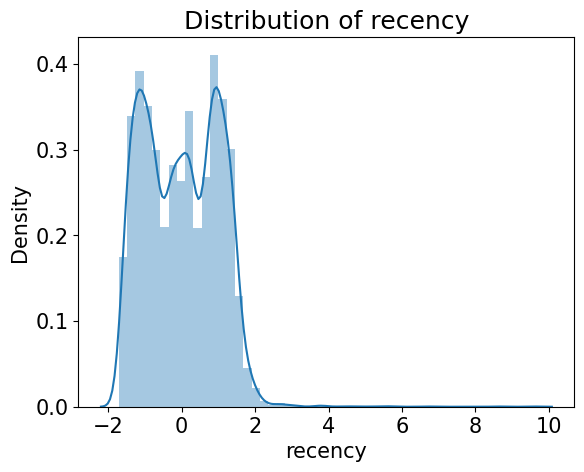

recency's: Skew: 0.339055557152284, : SkewtestResult(statistic=13.026296934670608, pvalue=8.671504578914924e-39)


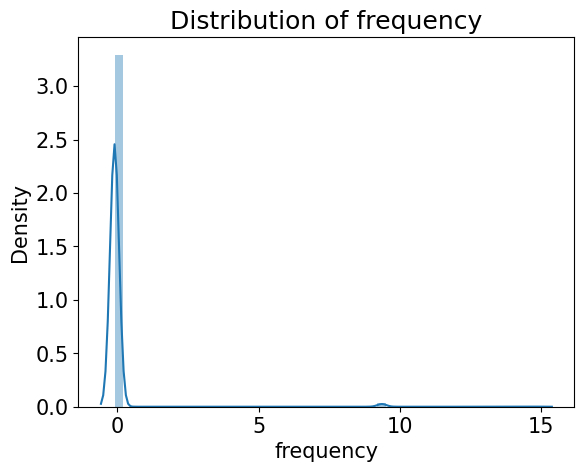

frequency's: Skew: 9.801873319074895, : SkewtestResult(statistic=102.57673072385275, pvalue=0.0)


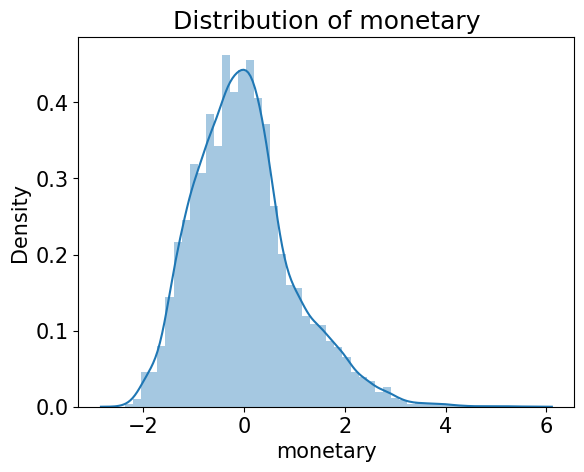

monetary's: Skew: 0.750872895667887, : SkewtestResult(statistic=26.54199373691502, pvalue=3.1773250347260957e-155)


In [42]:
# Chuyển đổi NumPy array thành DataFrame
RFM_log_scaled_df = pd.DataFrame(RFM_log_scaled, columns=['recency', 'frequency', 'monetary'])

# Kiểm tra độ chệch cho từng cột
for col in RFM_log_scaled_df.columns:
    check_skew(RFM_log_scaled_df, col)


In [ ]:
38. #hực hiện phân cụm (clustering) bằng thuật toán K-means và hiển thị biểu đồ Elbow để giúp xác định số lượng cụm tối ưu.
- from sklearn.cluster import KMeans: 'Import class KMeans từ module sklearn.cluster'
- from yellowbrick.cluster import KElbowVisualizer: 'Import class KElbowVisualizer từ module yellowbrick.cluster'
+ Yellowbrick là một thư viện hỗ trợ visualization cho scikit-learn.
- k_means = KMeans(): Tạo một đối tượng của KMeans để thực hiện phân cụm.
- elbow = KElbowVisualizer(k_means, k=(2, 20)): Tạo một đối tượng KElbowVisualizer và chỉ định mô hình KMeans cùng với 
khoảng giá trị k (số lượng cụm) từ 2 đến 20.
- elbow.fit(RFM_log_scaled_df): Thực hiện đào tạo mô hình KMeans trên dữ liệu đã được chuẩn hóa.
- elbow.show(): Hiển thị biểu đồ Elbow, để có thể quan sát "điểm elbow" trên đồ thị để xác định số lượng cụm tối ưu cho 
mô hình K-means.
- Biểu đồ Elbow thường cho thấy giảm độ biến động của dữ liệu khi số lượng cụm tăng lên. 
"Điểm elbow" là điểm nơi giảm độ biến động giảm chậm lại, và thường được chọn là số lượng cụm tối ưu cho mô hình K-means

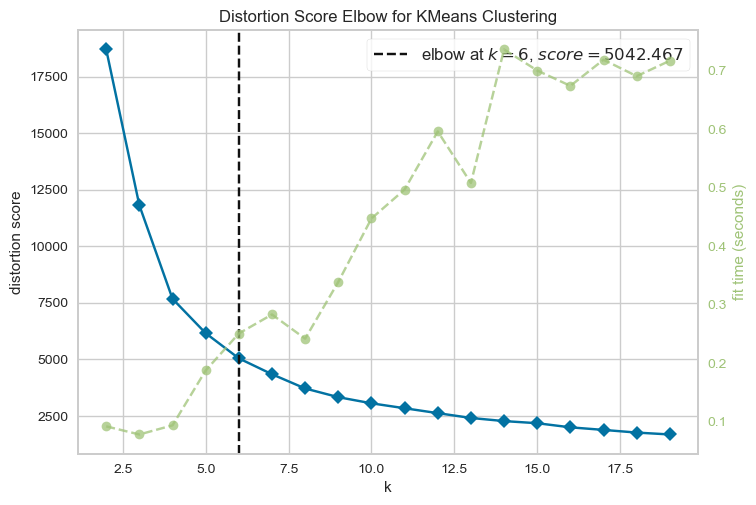

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
k_means = KMeans()
elbow = KElbowVisualizer(k_means, k=(2, 20))
elbow.fit(RFM_log_scaled_df)
elbow.show() 

In [ ]:
39. #sử dụng kết quả từ biểu đồ Elbow để xác định số lượng cụm tối ưu cho mô hình K-means s
#sau đó thực hiện phân cụm trên dữ liệu đã được chuẩn hóa 
- kmeans= KMeans(n_clusters=elbow.elbow_value_): Tạo một đối tượng KMeans với số lượng cụm được xác định bởi giá trị elbow
từ biểu đồ Elbow (elbow.elbow_value_).
- kmeans.fit(RFM_log_scaled_df): Thực hiện phân cụm (clustering) trên dữ liệu đã được chuẩn hóa (RFM_log_scaled_df) 
bằng mô hình K-means với số lượng cụm được xác định từ biểu đồ Elbow.
- kmeans sẽ chứa thông tin về các cụm (clusters) và mỗi điểm dữ liệu sẽ được gán vào một cụm cụ thể dựa trên mô hình K-means.
Cụm này có thể được sử dụng để phân tích và hiểu rõ hơn về cấu trúc của dữ liệu.

In [44]:
kmeans= KMeans(n_clusters=elbow.elbow_value_)
kmeans.fit(RFM_log_scaled_df)

KMeans(n_clusters=6)

In [ ]:
40. 
- RFM_log_scaled_df['Cluster']= kmeans.labels_: thêm một cột mới vào DataFrame RFM_log_scaled_df, gọi là 'Cluster', 
và gán nhãn cụm (cluster) tương ứng mà mỗi quan sát trong dữ liệu đã được gán vào.
- kmeans.labels_: là một mảng chứa nhãn của từng quan sát trong dữ liệu, nó xác định quan sát đó thuộc về cụm nào sau
khi mô hình K-means đã được huấn luyện.
- RFM_log_scaled_df['Cluster'] sẽ chứa thông tin nhãn cụm cho mỗi quan sát trong dữ liệu.
- Sau khi thêm cột 'Cluster', DataFrame sẽ có một cột mới để thể hiện cụm tương ứng với mỗi quan sát.
Điều này giúp bạn dễ dàng theo dõi và phân tích nhóm dữ liệu theo các cụm đã được tạo ra bởi mô hình K-means.

In [45]:
RFM_log_scaled_df['Cluster']= kmeans.labels_
RFM_log_scaled_df.head()

,recency,frequency,monetary,Cluster
0,0.896977,-0.102887,0.066981,5
1,-1.524851,-0.102887,-1.638392,1
2,-0.960542,-0.102887,-0.090325,4
3,-1.618903,-0.102887,0.947752,4
4,1.108593,-0.102887,0.411267,5


In [ ]:
41. #định nghĩa một hàm rfm_clusters_stat nhằm thực hiện việc tóm tắt thống kê cho mỗi cụm được tạo ra bởi mô hình K-means. 
- df.groupby(['Cluster']): Nhóm dữ liệu theo cột 'Cluster', tức là theo nhãn của cụm.
- .agg({ 'Recency'  : ['mean','median', 'min', 'max'], 'Frequency': ['mean','median', 'min', 'max'], 'Monetary' : ['mean','median', 'min', 'max', 'count'] })
Áp dụng các hàm thống kê cho từng cụm, bao gồm:
+ Trung bình (mean) và trung vị (median) của 'Recency', 'Frequency', và 'Monetary'.
+ Giá trị nhỏ nhất (min) và lớn nhất (max) của 'Recency', 'Frequency', và 'Monetary'.
+ Số lượng quan sát trong mỗi cụm (count).
- .round(0): Làm tròn giá trị thống kê đến số nguyên gần nhất.
- return df_new: Trả về DataFrame mới chứa các thông tin thống kê cho mỗi cụm.
- ta sẽ có một cái nhìn tổng quan về các đặc điểm thống kê của mỗi cụm, giúp hiểu rõ hơn về đặc điểm của từng nhóm khách hàng 
trong mô hình phân cụm.


In [46]:
# Function to visualize clusters
def rfm_clusters_stat(df):
    df_new = df.groupby(['Cluster']).agg({
            'Recency'  : ['mean','median', 'min', 'max'],
            'Frequency': ['mean','median', 'min', 'max'],
            'Monetary' : ['mean','median', 'min', 'max', 'count']
        }).round(0)

    return df_new

In [ ]:
42. #tạo một bản sao của DataFrame  RFM_df3 (chứa dữ liệu RFM đã được chuẩn hóa và không có cột nhóm cụm),
#sau đó thêm một cột mới vào DataFrame RFM_df4, gọi là 'Cluster', gán nhãn cụm tương ứng mà mỗi quan sát đã được gán 
#vào bởi mô hình K-means (kmeans.labels_).
- RFM_df3 là DataFrame chứa thông tin về RFM đã được chuẩn hóa, không chứa cột nhóm cụm.
- RFM_df4 là một bản sao của RFM_df`.
- RFM_df4['Cluster'] = kmeans.labels_:thêm cột 'Cluster' vào RFM_df4, và mỗi giá trị trong cột này đại diện cho nhãn 
cụm tương ứng của mỗi quan sát dựa trên mô hình K-means đã được huấn luyện.
- RFM_df4 sẽ chứa thông tin RFM đã được chuẩn hóa cùng với cột 'Cluster', giúp dễ dàng thực hiện các phân tích và thống kê
liên quan đến các nhóm cụm.

In [53]:
RFM_df4= RFM_df
RFM_df4['Cluster'] = kmeans.labels_
RFM_df4

,customer_unique_id,Recency,Frequency,Monetary,Cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,5
1,000ec5bff359e1c0ad76a81a45cb598f,8,1,27.75,1
2,00172711b30d52eea8b313a7f2cced02,32,1,122.07,4
3,001928b561575b2821c92254a2327d06,4,1,329.62,4
4,0019e8c501c85848ac0966d45226fa1d,120,1,197.27,5
...,...,...,...,...,...
9328,ffeb904468642a1ce663a322629801cb,63,1,93.11,1
9329,ffecceca389973ef16660d58696f281e,126,1,72.76,2
9330,fff2ae16b99c6f3c785f0e052f2a9cfb,131,1,200.90,5
9331,fff3e1d7bc75f11dc7670619b2e61840,40,1,82.51,1


In [ ]:
43. #tạo một bảng thống kê về các đặc điểm của từng cụm (cluster) trong DataFrame RFM_df4. 
- rfm_clusters_stat(RFM_df4): Gọi hàm rfm_clusters_stat trên DataFrame RFM_df4 để tạo bảng thống kê về các đặc điểm của 
từng cụm (cluster).
- .style.background_gradient(cmap='YlGnBu'): Áp dụng một hiệu ứng gradient màu nền cho bảng thống kê. 
Màu sắc sẽ thay đổi dựa trên giá trị của từng ô trong bảng, giúp làm nổi bật và nhìn nhận dễ dàng hơn về các giá trị lớn và nhỏ.
- Kết quả:một bảng thống kê giúp có cái nhìn trực quan và nhanh chóng về các đặc điểm của các nhóm cụm khác nhau 
trong dữ liệu RFM.

In [54]:
rfm_clusters_stat(RFM_df4).style.background_gradient(cmap='YlGnBu')

In [ ]:
44.#tạo một DataFrame mới có tên RFM_stats chứa thông tin thống kê về các đặc điểm của từng cụm (cluster) 
#trong DataFrame RFM_df4.
- rfm_clusters_stat(RFM_df4): Gọi hàm rfm_clusters_stat trên DataFrame RFM_df4 để tạo bảng thống kê về các đặc điểm của từng 
cụm (cluster).
- pd.DataFrame(...): Tạo một DataFrame mới từ kết quả của hàm rfm_clusters_stat.
- RFM_stats sẽ là một DataFrame chứa thông tin thống kê về Recency, Frequency, và Monetary cho từng cụm trong dữ liệu RFM
đã được phân cụm

In [55]:
RFM_stats= pd.DataFrame(rfm_clusters_stat(RFM_df4))

In [ ]:
45.##tạo một biểu đồ treemap để thể hiện số lượng khách hàng trong mỗi cụm (segment).
- plt.figure(figsize=(10, 6)): Tạo một figure với kích thước 10x6 inches để đặt biểu đồ treemap.
- squarify.plot(...): Tạo biểu đồ treemap với các thông số sau:
+ sizes=RFM_stats["Monetary"]["count"]: Kích thước của các hình chữ nhật trong treemap phản ánh số lượng khách hàng trong 
từng cụm, được lấy từ cột 'count' của bảng thống kê RFM_stats cho giá trị 'Monetary'.
+ label=RFM_stats.index: Nhãn của các hình chữ nhật, chúng ta sử dụng các nhãn là các nhóm cụm.
+ color=["b","g","r","m","c", "y"]: Màu sắc của các hình chữ nhật trong treemap.
+ alpha=0.7: Độ trong suốt của các hình chữ nhật.
+ plt.suptitle("Segments of Customers", fontsize=25): Thêm tiêu đề cho biểu đồ.

Text(0.5, 0.98, 'Segments of Customers')

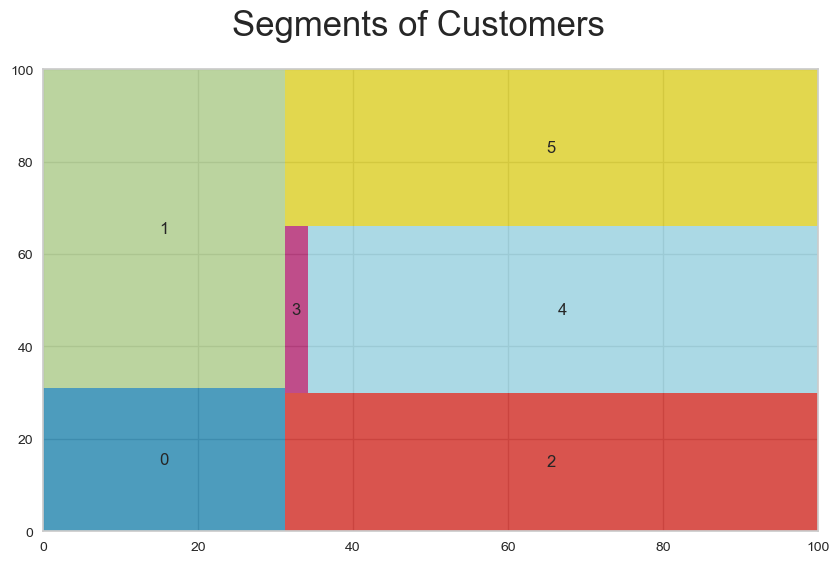

In [56]:
# Visualize Segments
plt.figure(figsize=(10, 6))
squarify.plot(sizes=RFM_stats["Monetary"]["count"], label=RFM_stats.index, color=["b","g","r","m","c", "y"], alpha=0.7)
plt.suptitle("Segments of Customers", fontsize=25)

In [57]:
RFM_stats

Recency                 Frequency                Monetary         \
           mean median min  max      mean median min max     mean median   
Cluster                                                                    
0          81.0   82.0   3  181       1.0    1.0   1   1   1212.0  807.0   
1          34.0   31.0   0   69       1.0    1.0   1   1     62.0   62.0   
2         105.0  106.0  70  259       1.0    1.0   1   1     62.0   61.0   
3          58.0   43.0   4  158       2.0    2.0   2   3    483.0  314.0   
4          37.0   35.0   0   76       1.0    1.0   1   1    216.0  178.0   
5         114.0  114.0  75  481       1.0    1.0   1   1    194.0  167.0   

                               
           min      max count  
Cluster                        
0        340.0  29100.0   905  
1         14.0    110.0  2007  
2         14.0    115.0  1923  
3         39.0   5999.0    99  
4        102.0    814.0  2219  
5         77.0    721.0  2180

In [ ]:
46. #dựa vào RFM_df4 để xác định các điểm dữ liệu thuộc các cụm 

In [58]:
# Groupby theo cột 'Cluster' và thu thập các giá trị 'customer_unique_id'
grouped_customers = RFM_df4.groupby('Cluster')['customer_unique_id'].apply(list)

# Hiển thị kết quả
for cluster, customers in grouped_customers.items():
    print(f"Cluster {cluster}: {len(customers)} customers - {customers}")

Cluster 0: 905 customers - ['0035029989e6fc5cf030918a5f9f2037', '004df63539fd5e38d4b0a0506de7549c', '00ae50eb5e1d2514f694dee1dcbbd5ae', '019fcfdd0b0ec239cc2b536428064c47', '01a4fe5fc00bbdb0b0a4af5a5345cca5', '01e123d7c7cedf12af483fc17258b9ce', '020ae51ab502504a00ab6ccbac53bfa6', '02ccceb879088a0253e1e46e0200bdb8', '02e8a66528e84b3ca6150d9b1e03a26f', '03bd7c8563706d3a512250498f0706c0', '0422bf9c5455d76bf0906b94b42bdc2c', '0435835f062a422e29d5f190c5b90e01', '0484f4053df3702347e3b260d0eccf39', '0487a94145b40ec78717e7d4044f182d', '04c9f042aaafb2430f14e0c3d46c0a68', '058d30d972910f7fa6cf0121695a6e37', '059063072de58e5a847e76c4593d5629', '05a021f89882d0c4df802f3c18897a34', '05cb25c0b98e8d6f839049d97adfecab', '05cc11f944a9cc2f8dd41fae770c313d', '061e0d9d23f099ebcc78d1c90f94dfbe', '0621cda5f3ee9a2e6f3ae6ebb5fcdbe1', '064fb6f70338688d1372235d95d92ff7', '0669ee32bf519c46d27030db08c5e0e3', '06b0421991a8b33ebcd370945f3494c0', '06e0c97721bd7ef0a4630570de1eeb98', '070447b7f798d0fff61e13a5a03522d3', 

In [ ]:
47. #nối RFM_df4 và merged_df bằng customer_unique_id
- RFM_df4 và merged_df là hai DataFrame cần nối.
- 'customer_unique_id' là cột chung được sử dụng để nối hai DataFrame.
- how='inner' chỉ định loại nối, trong trường hợp này là nối inner (chỉ giữ lại các hàng có giá trị khớp trong cả hai DataFrame).
- tạo một DataFrame mới (result_df) chứa thông tin từ cả hai DataFrame. Từ đó có thể có được thông tin về khách hàng có những 
đặc điểm như thế nào và thuộc cụm nào, để dựa vào thông tin của các khách hàng cùng nhóm có thể đưa ra chân dung của khách hàng 
trong mỗi nhóm.

In [59]:
# Nối hai DataFrame bằng cột 'customer_unique_id'
result_df = pd.merge(RFM_df4, merged_df, on='customer_unique_id', how='inner')

# Xem kết quả
print(result_df)

                     customer_unique_id  Recency  Frequency  Monetary  \
0      0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90   
1      000ec5bff359e1c0ad76a81a45cb598f        8          1     27.75   
2      00172711b30d52eea8b313a7f2cced02       32          1    122.07   
3      001928b561575b2821c92254a2327d06        4          1    329.62   
4      001928b561575b2821c92254a2327d06        4          1    329.62   
...                                 ...      ...        ...       ...   
11573  ffeb904468642a1ce663a322629801cb       63          1     93.11   
11574  ffecceca389973ef16660d58696f281e      126          1     72.76   
11575  fff2ae16b99c6f3c785f0e052f2a9cfb      131          1    200.90   
11576  fff3e1d7bc75f11dc7670619b2e61840       40          1     82.51   
11577  ffff5962728ec6157033ef9805bacc48      118          1    133.69   

       Cluster                       customer_id  customer_zip_code_prefix  \
0            5  fadbb3709178fc513abc1b2670aa1

In [ ]:
48. #tách các cụm khách hàng ra thành những bảng riêng tương ứng

In [61]:
clustered_groups = result_df.groupby('Cluster')

clustered_tables = {}

for cluster, group in clustered_groups:
    clustered_tables[f'Cluster_{cluster}'] = group

In [ ]:
#print(clustered_tables['Cluster_0'])
#print(clustered_tables['Cluster_1'])
#print(clustered_tables['Cluster_2'])
#print(clustered_tables['Cluster_3'])
#print(clustered_tables['Cluster_4'])
#print(clustered_tables['Cluster_5'])

In [ ]:
49. #lưu

In [ ]:
for cluster_name, cluster_df in clustered_tables.items():
    
    cluster_df.to_excel(f'{cluster_name}.xlsx', index=False)

In [ ]:
50. #xem kết quả 

In [62]:
Cluster_0= pd.read_excel('D:/Dai Hoc/năm 4 kỳ 1/phân tích dữ liệu bằng python/data midterm/result/Cluster_0.xlsx')
Cluster_1= pd.read_excel('D:/Dai Hoc/năm 4 kỳ 1/phân tích dữ liệu bằng python/data midterm/result/Cluster_1.xlsx')
Cluster_2= pd.read_excel('D:/Dai Hoc/năm 4 kỳ 1/phân tích dữ liệu bằng python/data midterm/result/Cluster_2.xlsx')
Cluster_3= pd.read_excel('D:/Dai Hoc/năm 4 kỳ 1/phân tích dữ liệu bằng python/data midterm/result/Cluster_3.xlsx')
Cluster_4= pd.read_excel('D:/Dai Hoc/năm 4 kỳ 1/phân tích dữ liệu bằng python/data midterm/result/Cluster_4.xlsx')
Cluster_5= pd.read_excel('D:/Dai Hoc/năm 4 kỳ 1/phân tích dữ liệu bằng python/data midterm/result/Cluster_5.xlsx')

In [63]:
Cluster_0.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,998.0,12.204409,6.319820,0.00,8.0000,12.000,16.0000,27.00
Frequency,998.0,1.000000,0.000000,1.00,1.0000,1.000,1.0000,1.00
Monetary,998.0,99.874509,95.518855,13.89,47.4775,69.810,118.3425,1312.67
Cluster_x,998.0,0.000000,0.000000,0.00,0.0000,0.000,0.0000,0.00
customer_zip_code_prefix,998.0,27577.188377,27513.248164,1009.00,6824.0000,15350.000,35918.2500,99260.00
review_score,998.0,4.146293,1.390122,1.00,4.0000,5.000,5.0000,5.00
order_item_id,998.0,1.061122,0.321842,1.00,1.0000,1.000,1.0000,6.00
price,998.0,65.693657,68.021690,3.98,29.0375,49.000,79.0000,1240.00
freight_value,998.0,16.655140,9.936650,0.00,9.0250,15.355,19.0075,90.90
product_name_lenght,998.0,49.655311,9.721159,12.00,43.2500,53.000,57.0000,63.00


In [ ]:
Cluster_1.describe().T

In [ ]:
Cluster_2.describe().T

In [ ]:
Cluster_3.describe().T

In [ ]:
Cluster_4.describe().T

In [ ]:
Cluster_5.describe().T

## HẾT ##


